<font size=5> **Exploratory Data Analysis Examples** </font>

O objetivo deste notebook é demonstrar alguns estudos de caso reais provenientes de cursos realizados ao longo da jornada de aprendizado. Em praticamente todos os casos, um problema de negócio será fornecido e, a partir de Datasets presentes no sistema de arquivos, serão realizados tratamentos específicos no conjunto de dados, preparando e avaliando as mellhores maneiras para responder as questões propostas. Entre os principais pontos abordados neste notebook encontram-se:

* Treinamento dos métodos obtidos através dos estudos;
* Aplicação de conceitos teóricos em situações práticas;
* Exploração de conjuntos de dados reais e práticos;
* Análise de problemas através de plotagem de gráficos;
* Aplicação de estatística descritiva para conclusões;

# Udacity

Nesta sessão, serão abordados os desafios presentes no curso *Fundamentos Data Scientists I* realizado através da plataforma *Udacity*. Os tópicos deste conteúdo englobam a análise de dados em seu caráter exploratório, realizando tratamentos específicos em conjuntos de dados visando sempre a resolução de um problema proposto.

## Cancer: Malignância de Tumores

### Descrição da Análise

Disposto de um Dataset contendo características sobre diversos tumores, serão utilizadas as habilidades aprendidas sobre tratamento de dados para verificar se **a área médio do tumor influencia em sua caracterização como MALIGNO ou BENIGNO**. Para entender melhor sobre este desafio, a próxima célula deste notebook será responsável pela leitura do Dataset e por mostrar uma visão inicial sobre os dados e os atributos.

Link para acesso aos dados: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv')
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Preparando Dados

Com o arquivo em mãos, a intenção é avaliar o passo a passo para se chegar ao resultado esperado. Percebe-se que, no conjunto em questão, há uma coluna chamada **diagnosis** responsável por identificar se o tumor é Maligno (M) ou Benigno (B). Como o objetivo, neste caso, é verificar se uma característica numérica (como o raio, por exemplo) influencia nessa classificação, seria interessante ter em mãos dois DataFrames diferentes, seguindo o formato:

* df_b = Dataset com dados apenas de tumores classificados como BENIGNO;
* df_b = Dataset com dados apenas de tumores classificados como MALIGNOS.

Antes dessa operação, é importante conhecer melhor o conjunto de dados.

In [2]:
# Verificando Dataset
df_cancer.shape

(564, 11)

In [5]:
print(f'Este Dataset possui {df_cancer.shape[0]} linhas e {df_cancer.shape[1]} colunas.')

Este Dataset possui 564 linhas e 11 colunas.


In [6]:
# Conhecendo as colunas (atributos) do Dataset
for i, col in enumerate(df_cancer.columns):
    print(f'Coluna {i}: {col}')

Coluna 0: diagnosis
Coluna 1: radius_mean
Coluna 2: texture_mean
Coluna 3: perimeter_mean
Coluna 4: area_mean
Coluna 5: smoothness_mean
Coluna 6: compactness_mean
Coluna 7: concavity_mean
Coluna 8: concave_points_mean
Coluna 9: symmetry_mean
Coluna 10: fractal_dimension_mean


In [7]:
# Verificando tipos de dados
df_cancer.dtypes

diagnosis                  object
radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave_points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
dtype: object

Aparentemente todos os dados estão em seus devidos formatos, ou seja, valores numéricos encontram-se com tipo `float64` e valores em formato de texto estão em formato `object` que, na verdade, trata-se de um formato do tipo `str`. Não será necessária nenhuma transformação de dados.

In [8]:
# Retornando estatísticas sobre os dados
df_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,564.000000,564.000000,564.000000,564.000000,516.000000,564.000000,564.000000,564.000000,499.000000,564.000000
mean,14.120335,19.276458,91.927784,654.047163,0.096097,0.104610,0.088832,0.048967,0.181204,0.062833
std,3.514862,4.232968,24.221072,350.428965,0.013935,0.052766,0.079158,0.038613,0.027961,0.007073
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.697500,16.292500,75.135000,420.175000,0.086290,0.065175,0.029540,0.020347,0.161800,0.057775
50%,13.375000,18.905000,86.415000,551.400000,0.095720,0.094575,0.061680,0.033770,0.179200,0.061545
75%,15.797500,21.680000,103.925000,782.700000,0.104825,0.130500,0.131950,0.074067,0.195800,0.066165
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [2]:
# Separando DataFrame 

df_b = df_cancer[df_cancer['diagnosis'] == 'B']
df_m = df_cancer[df_cancer['diagnosis'] == 'M']

In [3]:
# Verificando alterações
df_b.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863
40,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984


In [4]:
df_m.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [5]:
# Verificando contagem em cada um dos DataFrames
print(f'Amostras de tumores Maligno somam {df_m.shape[0]}.')
print(f'Tumores Benignos totalizam {df_b.shape[0]} amostras.')

Amostras de tumores Maligno somam 210.
Tumores Benignos totalizam 354 amostras.


In [6]:
# Selecionando dados de uma única coluna
df_b['area_mean']

19     566.3
20     520.0
21     273.9
37     523.8
40     489.9
46     201.9
48     449.3
49     561.0
50     427.9
51     571.8
52     437.6
55     409.0
58     527.2
59     224.5
60     311.9
61     221.8
63     260.9
66     269.4
67     394.1
68     250.5
69     502.5
71     244.0
74     470.9
75     657.1
76     559.2
79     506.3
80     401.5
81     520.0
84     443.3
88     466.1
       ...  
525    445.2
526    422.9
527    416.2
528    575.5
530    365.6
533    406.4
534    178.8
535    170.4
536    402.9
537    656.4
538    668.6
539    538.4
540    584.8
541    573.2
542    324.9
543    320.8
544    285.7
545    361.6
546    360.5
547    378.4
548    507.9
549    264.0
550    514.3
551    321.4
552    311.7
553    271.3
554    403.5
555    600.4
556    386.0
563    181.0
Name: area_mean, Length: 354, dtype: float64

In [15]:
# Retornando a média destes dados
df_m['area_mean'].mean()

976.5828571428573

In [16]:
# Comparando média das áreas
print(f'Área média de tumores Malignos: {df_m["area_mean"].mean():.2f}')
print(f'Área média de tumores Benignos: {df_b["area_mean"].mean():.2f}')

Área média de tumores Malignos: 976.58
Área média de tumores Benignos: 462.71


Já neste ponto, é possível verificar que a área média de tumores classificados como Malignos são *maiores* é maior que a área média de tumores tidos como Benignos. 

### Conclusões

De acordo com a preparação realizada acima, é possível concluir que a área média dos tumores de alguma forma tem influência em sua malignância. Tumores malignos costumam ser maiores que tumores benignos na grandeza área.

A análise gráfica auxilia na retirada de insights e formalização de conclusões.

In [7]:
# Importando matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

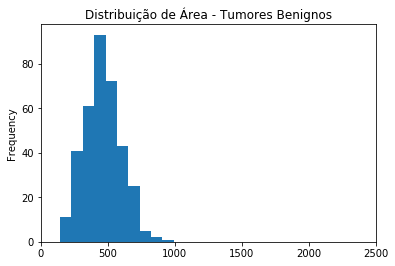

In [29]:
# Plotando gráficos
xlabel = range(0, 2501, 500)

# 1 - Distribuição de tumores benignos
df_b['area_mean'].plot(kind='hist', title='Distribuição de Área - Tumores Benignos', xticks=xlabel);

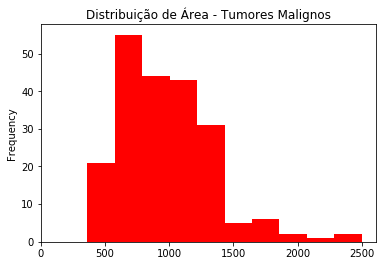

In [9]:
# 2 - Distribuição de tumores malignos
df_m['area_mean'].plot(kind='hist', title='Distribuição de Área - Tumores Malignos', color='r', xticks=xlabel);

Os gráficos acima mostram que os tumores malignos (vermelho) estão distribuidos mais a direita, ou seja, possuem maiores áreas.

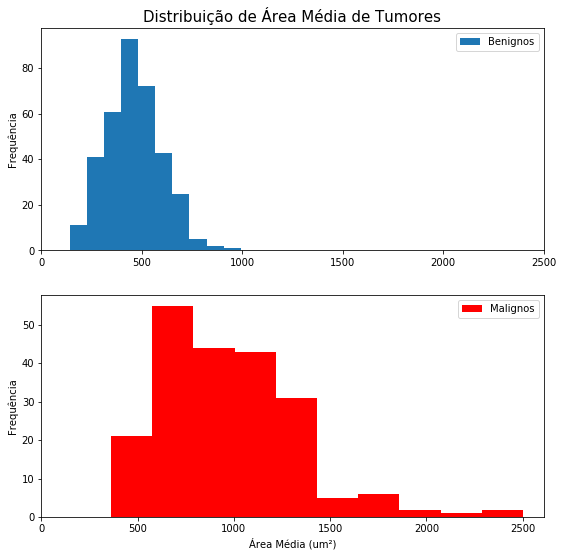

In [52]:
# Visualizando gráficos em duas janelas
fig, ax = plt.subplots(2, figsize=(9, 9))
ax[0].hist(df_b['area_mean'], label='Benignos');
ax[0].set_title('Distribuição de Área Média de Tumores', fontsize=15)
ax[0].legend()
ax[0].set_xticks(xlabel);
ax[0].set_ylabel('Frequência');

ax[1].hist(df_m['area_mean'], label='Malignos', color='r')
ax[1].legend()
ax[1].set_xticks(xlabel);
ax[1].set_xlabel('Área Média (um²)');
ax[1].set_ylabel('Frequência');

O conjunto de gráficos acima melhora a visualização e confirma a conclusão de que tumores malignos normalmente possuem área maior. Entretanto, ainda é possível melhorar. 

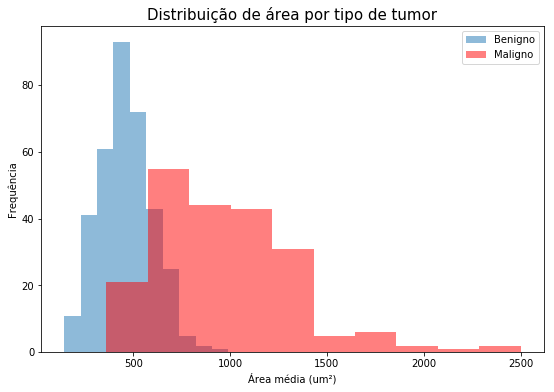

In [68]:
# Plotando as duas distribuições no mesmo gráfico
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
ax.hist(df_b['area_mean'], alpha=.5, label='Benigno');
ax.hist(df_m['area_mean'], alpha=.5, color='r', label='Maligno');
ax.legend();
ax.set_title('Distribuição de área por tipo de tumor', fontsize=15);
ax.set_xlabel('Área média (um²)');
ax.set_ylabel('Frequência');

## Censo: Ganhos Anuais e Idade

### Descrição da Análise

Munidos de um Dataset contendo uma grande quantidade de informações a respeito do Censo Americano, é feita a seguinte pergunta: **há alguma relação entre o ganho anual e algum outro atributo significante entre os entrevistados?**. Para entender melhor a questão, informações adicionais sobre este conjunto de dados apresentam-se abaixo:


In [1]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


A coluna que indica os *ganhos anuais* de cada amostra é identificada pela sigla **income**. É necessário reparar que estes dados não estão em formato numérico, como era de se esperar, mas sim em caráter classificatório, ou seja, as amostras estão separadas em ganhos maiores que US50.000,00 ou menores ou iguais a US$50.000,00.

### Preparando e Avaliando Dados

In [74]:
# Visualizando coluna income
df_census['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [75]:
# Visualizando tipos de dados
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Aparentemente os tipos de dados estão corretos, ou seja, colunas numéricas possuem dados do tipo `float` ou `int` e, da mesma forma, colunas de texto estão salvas no formato `object` que, lembrando, trata-se de formatos do tipo `string`.

In [76]:
# Visualizando algumas estatísticas
df_census.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [77]:
# Quantidade de linhas e colunas
df_census.shape

(32561, 15)

In [81]:
# Há dados faltantes?
df_census.isnull().values.any()

False

In [83]:
# Dados duplicados?
df_census.duplicated().any()

True

Análise sobre dados duplicados: como se trata de dados do Censo Americano, ou seja, pesquisa realizada com cidadãos, é perfeitamente possível que haja dados duplicados. Neste caso, este tipo de duplicação significa que há pessoas com o mesmo atributo, ou seja, idade, educação, ganho, etc...

In [85]:
# Contando dados duplicados
df_census.duplicated().values.sum()

24

In [ ]:
"""
Próximas tarefas: separar DataFrames de acordo com os ganhos anuais (income). Realizar análises com outras colunas.
"""

In [8]:
# Separando DataFrames de acordo com os ganhos anuais
df1 = df_census[df_census['income'] == ' >50K']
df2 = df_census[df_census['income'] == ' <=50K']

In [9]:
# Verificando alterações
df1.shape

(7841, 15)

In [10]:
df2.shape

(24720, 15)

In [11]:
# DataFrame com pessoas que ganham acima de 50K
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [12]:
# DataFrame com pessoas que ganham 50K ou menos
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Este tipo de procedimento normalmente é feito utilizando a função `.query()` do Pandas. A sintaxe seguiria o formato:

In [13]:
# Separando DataFrames com .query()
df1 = df_census.query('income == " >50K"')
df2 = df_census.query('income == " <=50K"')

In [14]:
# Verificando através de shape (números devem bater com as células acima)
print(f'df1: {df1.shape}')
print(f'df2: {df2.shape}')

df1: (7841, 15)
df2: (24720, 15)


### Conclusões

Com os dados devidamente preparados, é possível avaliar quais são os principais atributos que determinam ganhos acima ou abaixo de 50K anuais. Qual a diferença entre o nível de graduação nos dois Datasets?

In [1]:
# Importando matplotlib

import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
# Ajuda para o gráfico de barras
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    Make a bar plot with rectangles bounded by
    
    .. math::
    
       (x - width/2, x + width/2, bottom, bottom + height)
    
    (left, right, bottom and top edges) by default.  *x*,
    *height*, *width*, and *bottom* can be either scalars or
    sequences.
    
    The *align* and *orientation* kwargs control the interpretation of *x*
    and *bottom*
    
    The *align* keyword-only argument controls if *x* is interpreted
    as the center or the left edge of the rectangle.
    
    Parameters
    ----------
    x : sequence of scalars
        the x coordinates of the bars.
    
        *align* controls if *x* is the bar center (default) or
        left edge.
    
    heig

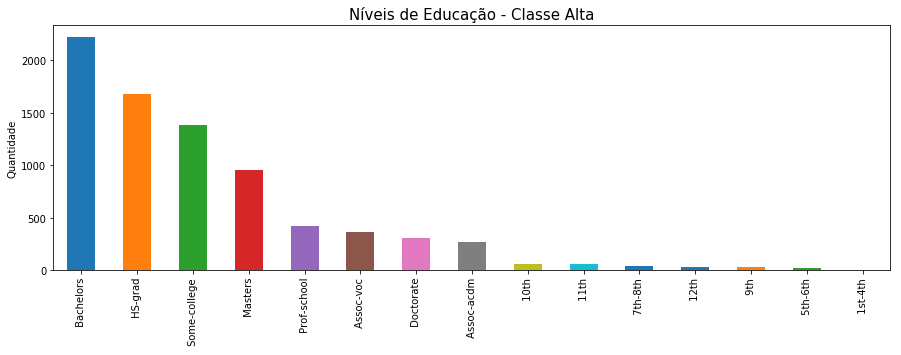

In [85]:
# Plotando - Classe Alta
ind = df1['education'].value_counts().index
fig, ax = plt.subplots(figsize=(15, 5))
ax = df1['education'].value_counts()[ind].plot(kind='bar')
plt.xticks(rotation='vertical');
ax.set_title('Níveis de Educação - Classe Alta', fontsize=15)
ax.set_ylabel('Quantidade');
plt.subplots_adjust(bottom=0.2)

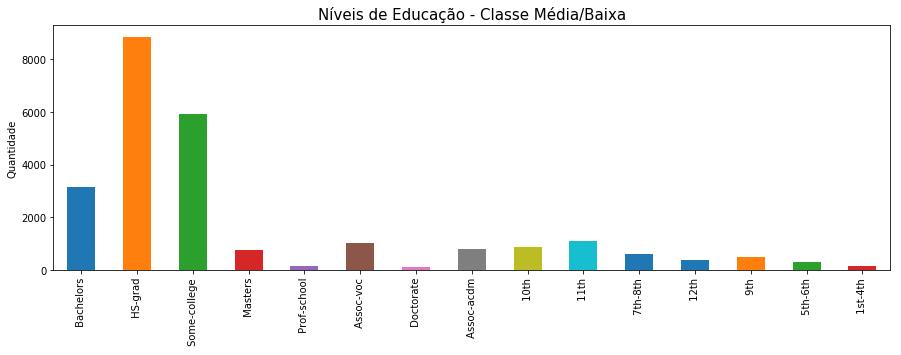

In [70]:
# Plotando - Classe Média/Baixa
fig, ax = plt.subplots(figsize=(15, 5))
ax = df2['education'].value_counts()[ind].plot(kind='bar')
ax.set_title('Níveis de Educação - Classe Média/Baixa', fontsize=15)
ax.set_ylabel('Quantidade');
plt.subplots_adjust(bottom=0.2)

Apesar de favorecerem a comparação, as plotagens acima poderiam ser representadas de maneira diferente, visto que a quantidade de amostras em ambos os datasets é diferente (isto pode ser evidenciado pela diferença no eixo y nos gráficos). O ideal, neste caso, seria representar os valores por porcentagem do total.

In [71]:
print(f'Amostras em df1: {df1.shape[0]}')
print(f'Amostras em df2: {df2.shape[0]}')

Amostras em df1: 7841
Amostras em df2: 24720


In [87]:
prop_df1 = 100 * df1['education'].value_counts() / df1.shape[0]
prop_df1

 Bachelors       28.325469
 HS-grad         21.362071
 Some-college    17.689070
 Masters         12.230583
 Prof-school      5.394720
 Assoc-voc        4.604005
 Doctorate        3.902563
 Assoc-acdm       3.379671
 10th             0.790715
 11th             0.765209
 7th-8th          0.510139
 12th             0.420865
 9th              0.344344
 5th-6th          0.204056
 1st-4th          0.076521
Name: education, dtype: float64

In [89]:
prop_df2 = 100 * df2['education'].value_counts() / df2.shape[0]
prop_df2

 HS-grad         35.703883
 Some-college    23.883495
 Bachelors       12.677994
 11th             4.510518
 Assoc-voc        4.130259
 10th             3.523463
 Assoc-acdm       3.244337
 Masters          3.090615
 7th-8th          2.451456
 9th              1.970065
 12th             1.618123
 5th-6th          1.282362
 1st-4th          0.655340
 Prof-school      0.618932
 Doctorate        0.432848
 Preschool        0.206311
Name: education, dtype: float64

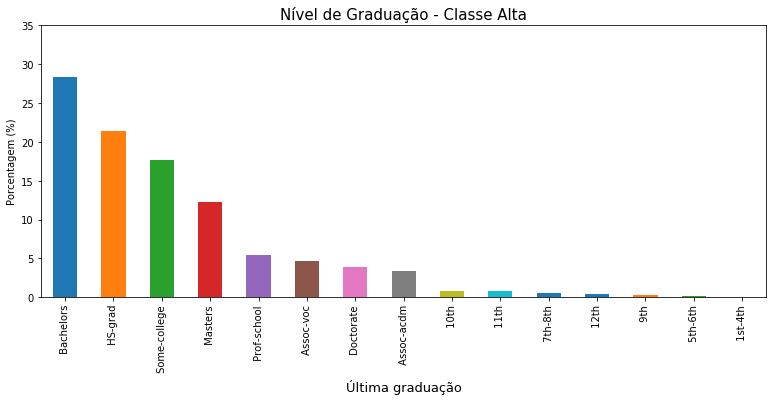

In [141]:
# Plotando gráficos
import numpy as np

fig, ax = plt.subplots(figsize=(13, 5))
ax = prop_df1[ind].plot(kind='bar')
ax.set_yticks(np.arange(0, 40, 5));
ax.set_ylabel('Porcentagem (%)', fontsize=10)
ax.set_xlabel('Última graduação', fontsize=13)
ax.set_title('Nível de Graduação - Classe Alta', fontsize=15)
plt.show()

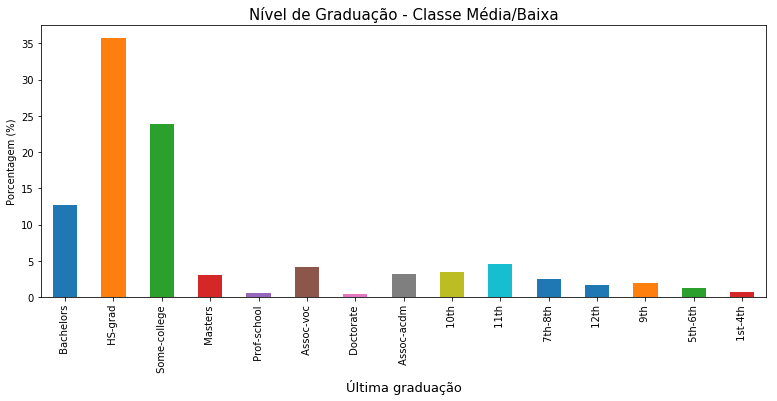

In [142]:
fig, ax = plt.subplots(figsize=(13, 5))
ax = prop_df2[ind].plot(kind='bar')
ax.set_yticks(np.arange(0, 40, 5));
ax.set_ylabel('Porcentagem (%)', fontsize=10)
ax.set_xlabel('Última graduação', fontsize=13)
ax.set_title('Nível de Graduação - Classe Média/Baixa', fontsize=15)
plt.show()

**Considerações:** Após a avaliação gráfica, a diferença entre os níveis de escolaridade entre as Classes Alta e Média/Baixa ficaram evidente. No conjunto de dados com maior condição financeira, diplomas de Doutorado, Mestrado e Bacharelado são mais comuns. O que é visto no conjunto de dados de classe média/baixa é uma maior distribuição em escolaridades fundamentais.

Outra pergunta: **Qual a distribuição de idades de pessoas que ganham mais com relação às que ganham menos?**

In [143]:
# Verificando colunas
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [150]:
# Ajuda histograma
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequency of


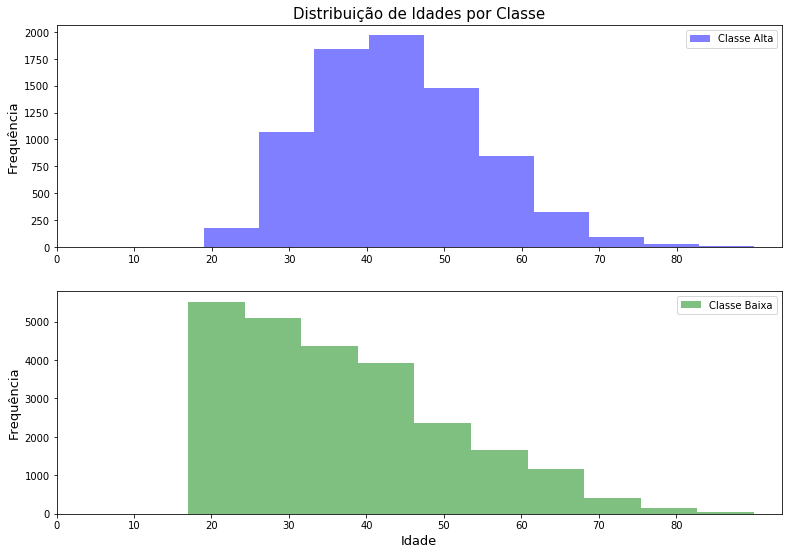

In [169]:
# Plotando
fig, ax = plt.subplots(2, 1, figsize=(13, 9))
for axe in ax:
    axe.set_ylabel('Frequência', fontsize=13)
    axe.set_xticks(np.arange(0, 90, 10))
ax[0].hist(df1['age'], label='Classe Alta', color='b', alpha=.5);
ax[0].set_xticks(np.arange(0, 90, 10));
ax[0].set_title('Distribuição de Idades por Classe', fontsize=15)
ax[0].legend()

ax[1].hist(df2['age'], label='Classe Baixa', color='g', alpha=.5);
ax[1].set_xticks(np.arange(0, 90, 10));
ax[1].set_xlabel('Idade', fontsize=13)
ax[1].legend()

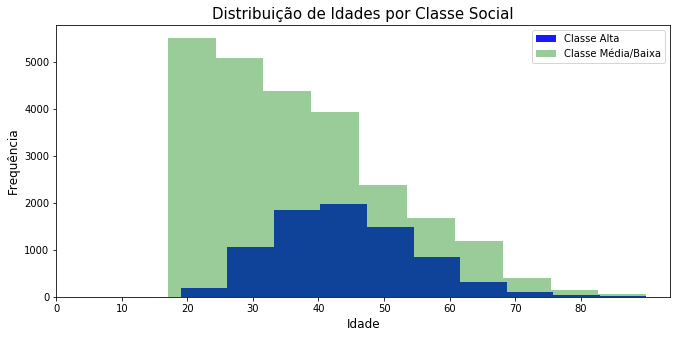

In [177]:
# Plotando os dois no mesmo objeto figure
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
ax.hist(df1['age'], label='Classe Alta', color='b', alpha=.9)
ax.hist(df2['age'], label='Classe Média/Baixa', color='g', alpha=.4)
ax.set_title('Distribuição de Idades por Classe Social', fontsize=15)
ax.set_ylabel('Frequência', fontsize=12)
ax.set_xlabel('Idade', fontsize=12)
ax.set_xticks(np.arange(0, 90, 10))
ax.legend()
plt.show()

**Considerações:** Os gráficos acima auxiliam na percepção de que, geralmente, pessoas com maior poder aquisitivo (Classe Alta) são mais "velhas" com relação a pessoas com menor poder aquisitivo (Classe Média/Baixa). Este resultado, a princípio, é plausível, visto que a estabilidade financeira normalmente ocorre com o passar do tempo.

## Análise Química de Vinhos: Qualidade

Neste estudo de caso, são apresentados dois Datasets diferentes, cada um contendo informações e características químicas de dois tipos de vinhos: Tinto e Branco. Dispondo de todo o leque de funções oferecidas pelas biblioteca do PyData Stack, propõe-se uma análise para verificar se **a qualidade atribuída a determinado tipo de vinho possui influência de seus demais atributos químicos**. Para manter o costume, este primeiro contato visa a familiarização com os conjuntos de dados oferecidos.

Link: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Avaliando Dados

In [178]:
# Importando bibliotecas e lendo arquivos
import pandas as pd

df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv')
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv')

In [179]:
# Verificando amostras
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Primeiro desafio já encontrado: O separador padrão para este dataset é **;** e não simplesmente **,** - parâmetro `sep='separador'` deve ser dado.

In [180]:
# Nova leitura com separador=;
df_red = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-red.csv', sep=';')
df_white = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-white.csv', sep=';')

In [181]:
# Verificando Vinho Tinto
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [182]:
# Verificando Vinho Branco
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [183]:
# Quantidade de linhas
print(f'Amostras de Vinho Tinto: {df_red.shape[0]}')
print(f'Amostras de Vinho Branco: {df_white.shape[0]}')

Amostras de Vinho Tinto: 1599
Amostras de Vinho Branco: 4898


In [189]:
# Dados nulos?
print(f'Há dados nulos nas amostras de Vinho Tinto?\nR: {df_red.isnull().values.any()}')
print()
print(f'Há dados nulos nas amostras de Vinho Branco?\nR: {df_white.isnull().values.any()}')

Há dados nulos nas amostras de Vinho Tinto?
R: False

Há dados nulos nas amostras de Vinho Branco?
R: False


In [194]:
# Dados duplicados?
print(f'Há dados duplicados nas amostras de Vinho Tinto?\nR: {df_red.duplicated().any()}', end='')
print(f' - {df_red.duplicated().values.sum()} dados duplicados.')

Há dados duplicados nas amostras de Vinho Tinto?
R: True - 240 dados duplicados.


In [197]:
print(f'Há dados duplicados nas amostras de Vinho Branco?\nR: {df_white.duplicated().any()}', end='')
print(f' - {df_white.duplicated().values.sum()} dados duplicados.')

Há dados duplicados nas amostras de Vinho Branco?
R: True - 937 dados duplicados.


Análise: apesar de haver dados duplicados, em se tratando de propriedades químicas sobre determinada amostra, é perfeitamente possível que dois vinhos diferentes, da mesma categoria, possuam atributos identicos. O range de possibilidades, neste caos, é pequeno, o que dá margem para este tipo de situação. O veredicto é que estes dados duplicados sejam mantidos nos Datasets.

In [198]:
# Comparando alguns parâmetros entre os tipos de vinhos
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [199]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [200]:
# Densidade média
print(f'Densidade média - Vinho Tinto: {df_red["density"].mean():.2f}g/cm³')
print(f'Densidade média - Vinho Branco: {df_white["density"].mean():.2f}g/cm³')

Densidade média - Vinho Tinto: 1.00g/cm³
Densidade média - Vinho Branco: 0.99g/cm³


In [202]:
# pH
print(f'pH médio - Vinho Tinto: {df_red["pH"].mean():.2f}')
print(f'pH médio - Vinho Branco: {df_white["pH"].mean():.2f}')

pH médio - Vinho Tinto: 3.31
pH médio - Vinho Branco: 3.19


In [203]:
# Qualidade
print(f'Índice de Qualidade médio - Vinho Tinto: {df_red["quality"].mean():.2f}')
print(f'Índice de Qualidade médio - Vinho Branco: {df_white["quality"].mean():.2f}')

Índice de Qualidade médio - Vinho Tinto: 5.64
Índice de Qualidade médio - Vinho Branco: 5.88


In [209]:
df_red.describe()['pH']['mean']

3.311113195747343

In [212]:
# Printando todos os atributos
def show_means(df):
    for col in df.describe().columns:
        print(f"Atributo: {col} - média: {df.describe()[col]['mean']:.2f}")

In [213]:
# Vinho Tinto
show_means(df_red)

Atributo: fixed acidity - média: 8.32
Atributo: volatile acidity - média: 0.53
Atributo: citric acid - média: 0.27
Atributo: residual sugar - média: 2.54
Atributo: chlorides - média: 0.09
Atributo: free sulfur dioxide - média: 15.87
Atributo: total sulfur dioxide - média: 46.47
Atributo: density - média: 1.00
Atributo: pH - média: 3.31
Atributo: sulphates - média: 0.66
Atributo: alcohol - média: 10.42
Atributo: quality - média: 5.64


In [214]:
# Vinho Branco
show_means(df_white)

Atributo: fixed acidity - média: 6.85
Atributo: volatile acidity - média: 0.28
Atributo: citric acid - média: 0.33
Atributo: residual sugar - média: 6.39
Atributo: chlorides - média: 0.05
Atributo: free sulfur dioxide - média: 35.31
Atributo: total sulfur dioxide - média: 138.36
Atributo: density - média: 0.99
Atributo: pH - média: 3.19
Atributo: sulphates - média: 0.49
Atributo: alcohol - média: 10.51
Atributo: quality - média: 5.88


In [215]:
# Verificando tipos de dados
# Vinho Tinto
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [216]:
# Vinho Branco
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Não será necessária nenhuma conversão de dados.

In [217]:
# Verificando informações detalhadas
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Preparando Dados

Após uma breve familiarização com os conjuntos de dados fornecidos, os esforços agora serão voltados para trabalhar no problema a ser resolvido: relacionar a qualidade (nota dada na coluna *quality*) de cada amostra de Vinho com algum atributo em especial. Para isso, o primeiro passo a se fazer é **unir** os dois conjuntos de vinhos, trabalhando com um único conjunto de dados.

Para unir os dois Datasets, antes é necessário realizar alguns procedimentos:

* Criar, em cada um dos Datasets, uma coluna adicional com a respectiva 'cor' ou 'tipo' do Vinho;
* Para realizar este procedimento, é necessário utilizar as funções do objeto array do NumPy;
* Criar um terceiro DataFrame que irá receber a união dos dois DataFrames.

In [218]:
# Criando array de tipo
import numpy as np

help(np.repeat)

Help on function repeat in module numpy.core.fromnumeric:

repeat(a, repeats, axis=None)
    Repeat elements of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    repeats : int or array of ints
        The number of repetitions for each element.  `repeats` is broadcasted
        to fit the shape of the given axis.
    axis : int, optional
        The axis along which to repeat values.  By default, use the
        flattened input array, and return a flat output array.
    
    Returns
    -------
    repeated_array : ndarray
        Output array which has the same shape as `a`, except along
        the given axis.
    
    See Also
    --------
    tile : Tile an array.
    
    Examples
    --------
    >>> np.repeat(3, 4)
    array([3, 3, 3, 3])
    >>> x = np.array([[1,2],[3,4]])
    >>> np.repeat(x, 2)
    array([1, 1, 2, 2, 3, 3, 4, 4])
    >>> np.repeat(x, 3, axis=1)
    array([[1, 1, 1, 2, 2, 2],
           [3, 3, 3, 4, 4, 4]])
    >>> np.rep

In [220]:
# Testando
array_red = np.repeat('red', 3)

In [221]:
array_red

array(['red', 'red', 'red'], dtype='<U3')

In [222]:
# Segundo argumento = quantidade de amostras de cada df
array_red = np.repeat('red', df_red.shape[0])
array_red

array(['red', 'red', 'red', ..., 'red', 'red', 'red'], dtype='<U3')

In [223]:
array_white = np.repeat('white', df_white.shape[0])
array_white

array(['white', 'white', 'white', ..., 'white', 'white', 'white'],
      dtype='<U5')

In [229]:
# Verificando se as quantidades estão corretas (Resultados têm de ser True)
print(f'Quantidade de amostras batem para Vinho Branco? {array_white.shape[0] == df_white.shape[0]}')
print(f'Quantidade de amostras batem para Vinho Tinto? {array_red.shape[0] == df_red.shape[0]}')

Quantidade de amostras batem para Vinho Branco? True
Quantidade de amostras batem para Vinho Tinto? True


In [230]:
# Agora que está tudo ok, deve-se adicionar colunas aos respectivos DataFrames
df_red['color'] = array_red
df_white['color'] = array_white

In [231]:
# Verificando
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [232]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [234]:
# Por fim, deve-se criar um novo objeto DataFrame e unir os dois conjuntos através da função .append()
df_wine = df_red.append(df_white)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [235]:
# Verificando através da contagem de amostras (Resultado deve ser True)
df_wine.shape[0] == df_red.shape[0] + df_white.shape[0]

True

Um fato de muita importância durante a fase de preparação dos dados é o nome atribuído às colunas do Dataset. É possível verificar, neste caso, que as colunas que possuem mais de uma palavra por nome contém espaços, o que dificulta o trabalho em algumas situações. Dessa forma, é necessário realizar mais uma alteração neste conjunto de dados.

In [237]:
# Renomeando colunas
df_wine.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_wine.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [238]:
# Salvando alterações
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv', index=False)

### Tentativas de Conclusões

Após a completa preparação dos dados, parte-se para a etapa de conclusões. Lembrando que o problema proposto é verificar se a qualidade de cada conjunto de dados está relacionada com alguma característica química específica.

In [271]:
# Visualizando relações entre todas as variáveis
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

help(pd.plotting.scatter_matrix)

Help on function scatter_matrix in module pandas.plotting._misc:

scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwds)
    Draw a matrix of scatter plots.
    
    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot

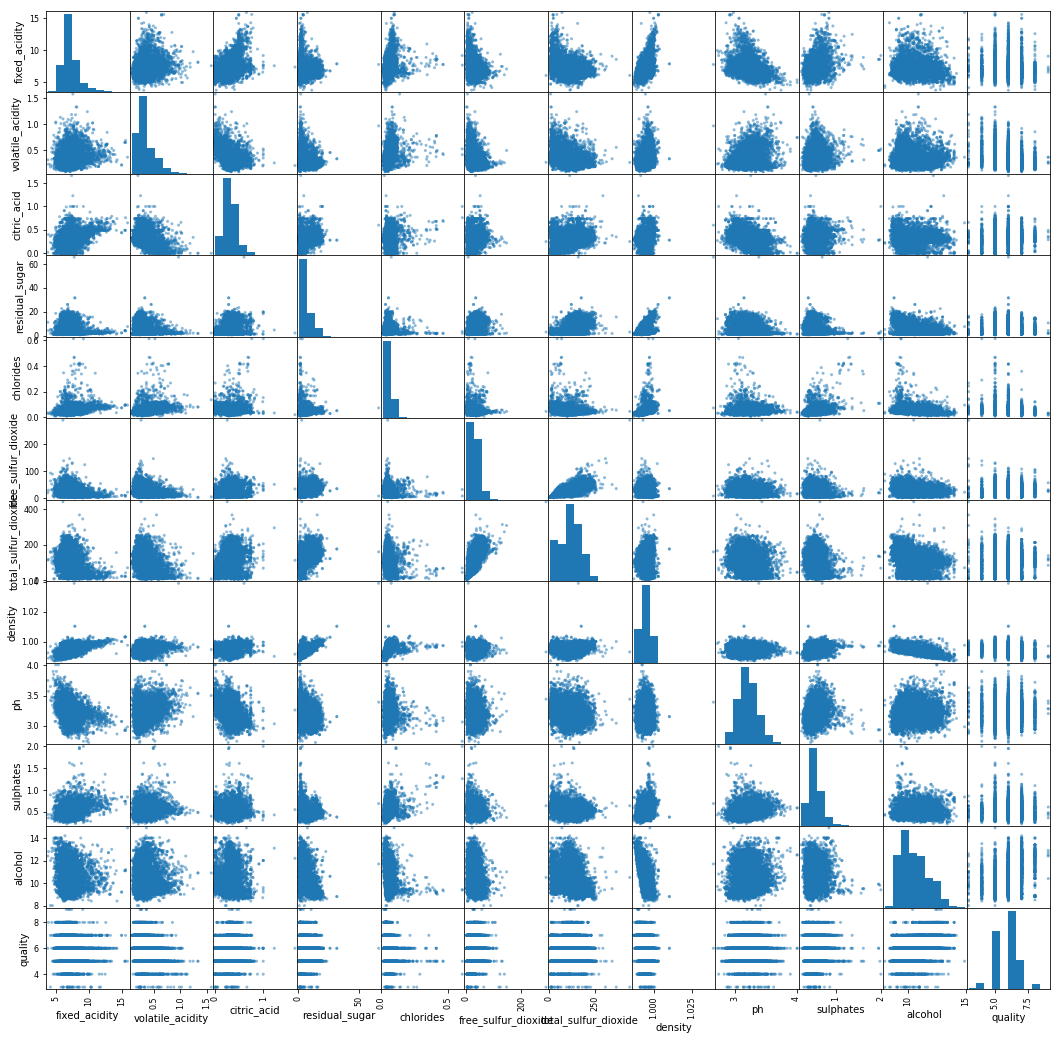

In [248]:
# Plotando
pd.plotting.scatter_matrix(df_wine, figsize=(18, 18));

Devido a grande quantidade de variáveis, a visão geral sobre as correlações entre os atributos é dificultada. Entretanto, algumas poucas conclusões já podem ser retiradas desta análise preliminar:

* Aparentemente a *qualidade* não possui fortes correlações diretas com nenhum outro atributo;
* Outros atributos, entretanto, possuem correlações entre si (*density* e *fixed_acidity*, *density* e *alcohol*, etc)
* O pH possui correlação negativa com fixed_acidity (conclusão plausível).

Mesmo tendo em vista essas afirmações, é possível avaliar conclusões mais profundas com algumas funções diferencidas do pandas, como é o caso do `groupby()`. Com ela, os dados podem ser agrupados de acordo com determina(s) característica(s).

In [253]:
# Ajuda
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.generic:

groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, str, or iterable
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A str or list of strs
        may be passed to group by the columns in ``self``
    axis : int, default 0
    level : int, level name, or sequence of such, default None
        If the axis is a MultiIndex (hierar

In [254]:
# Agrupando por qualidade - média de atributos
df_wine.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Dois pontos que podem ser percebidos:
* Maiores qualidades estão relacionadas com **baixos** índices de **chlorides**.
* Maiores qualidades estão relacionadas com **baixos** índices de **sulphates**.
* Maiores qualidades estão relacionados com **altos** índices de **alcohol**.

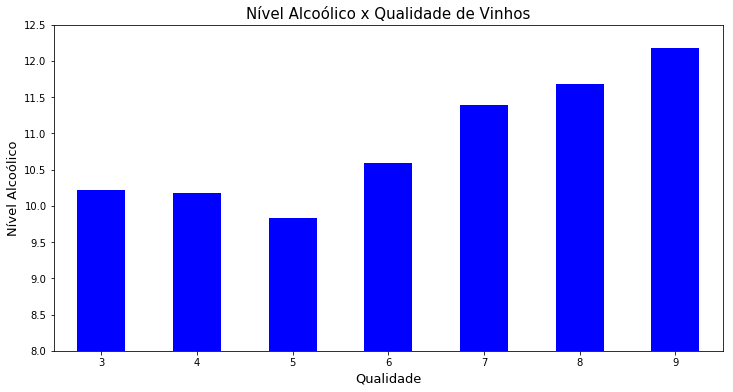

In [276]:
# Plotando gráfico - Nível Alcoólico
fig, ax = plt.subplots(figsize=(12, 6))
ax = df_wine.groupby('quality').mean()['alcohol'].plot(kind='bar', color='b')
ax.set_title('Nível Alcoólico x Qualidade de Vinhos', fontsize=15)
ax.set_xlabel('Qualidade', fontsize=13)
plt.xticks(rotation='horizontal')
ax.set_ylabel('Nível Alcoólico', fontsize=13)
ax.set_ylim(8, 12.5)
plt.show()

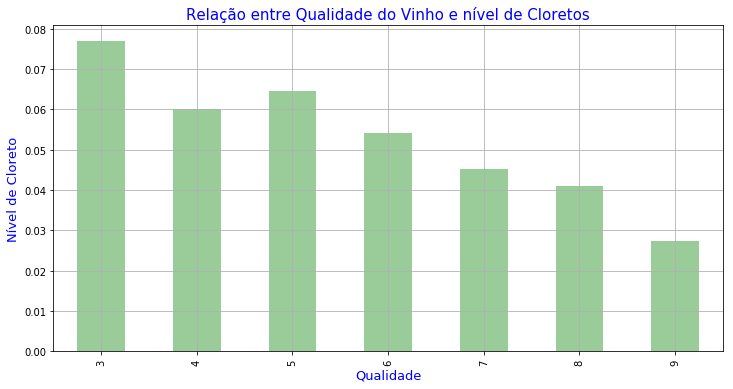

In [283]:
# Plotando gráfico - Cloretos
fig, ax = plt.subplots(figsize=(12, 6))
ax = df_wine.groupby('quality').mean()['chlorides'].plot(kind='bar', color='g', alpha=.4)
ax.set_title('Relação entre Qualidade do Vinho e nível de Cloretos', fontsize=15, color='b')
ax.set_xlabel('Qualidade', fontsize=13, color='b')
ax.set_ylabel('Nível de Cloreto', fontsize=13, color='b')
plt.grid(True)
plt.show()

Ainda sim, é possível se chegar a mais conclusões através do groupby.

In [284]:
# Verificando qualidade x tipo de vinho
df_wine.groupby(['quality', 'color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     ph  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [286]:
# Agrupando apenas por tipo de vinho
df_wine.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


O agrupamento acima evidencia a diferença dos atributos entre os dois tipos de vinho.

**Desafio:** o que poderia ser feito para responder a seguinte pergunta:

A qual categoria de Vinho pertence a maior taxa de vinhos aprovados com a maior nota possível?

In [287]:
# Verificando maior nota
df_wine['quality'].max()

9

In [294]:
# Agrupando entre as duas categorias
df_wine.groupby(['color', 'quality']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color quality                                                                 
red   3             8.360000          0.884500     0.171000        2.635000   
      4             7.779245          0.693962     0.174151        2.694340   
      5             8.167254          0.577041     0.243686        2.528855   
      6             8.347179          0.497484     0.273824        2.477194   
      7             8.872362          0.403920     0.375176        2.720603   
      8             8.566667          0.423333     0.391111        2.577778   
white 3             7.600000          0.333250     0.336000        6.392500   
      4             7.129448          0.381227     0.304233        4.628221   
      5             6.933974          0.302011     0.337653        7.334969   
      6             6.837671          0.260564     0.338025        6.441606   
      7             6.734716          0.262767     0.325625        5.186477   
      8             6.657143          0.277400     0.326514        5.671429   
      9             7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
color quality                                                                   
red   3         0.122500            11.000000             24.900000  0.997464   
      4         0.090679            12.264151             36.245283  0.996542   
      5         0.092736            16.983847             56.513950  0.997104   
      6         0.084956            15.711599             40.869906  0.996615   
      7         0.076588            14.045226             35.020101  0.996104   
      8         0.068444            13.277778             33.444444  0.995212   
white 3         0.054300            53.325000            170.600000  0.994884   
      4         0.050098            23.358896            125.279141  0.994277   
      5         0.051546            36.432052            150.904598  0.995263   
      6         0.045217            35.650591            137.047316  0.993961   
      7         0.038191            34.125568            125.114773  0.992452   
      8         0.038314            36.720000            126.165714  0.992236   
      9         0.027400            33.400000            116.000000  0.991460   

                     ph  sulphates    alcohol  
color quality                                  
red   3        3.398000   0.570000   9.955000  
      4        3.381509   0.596415  10.265094  
      5        3.304949   0.620969   9.899706  
      6        3.318072   0.675329  10.629519  
      7        3.290754   0.741256  11.465913  
      8        3.267222   0.767778  12.094444  
white 3        3.187500   0.474500  10.345000  
      4        3.182883   0.476135  10.152454  
      5        3.168833   0.482203   9.808840  
      6        3.188599   0.491106  10.575372  
      7        3.213898   0.503102  11.367936  
      8        3.218686   0.486229  11.636000  
      9        3.308000   0.466000  12.180000

Já é possível verificar, através do agrupamento acima, que os Vinhos Tintos não possuem nenhuma amostra aprovada com nota máxima!

In [295]:
# Visualizando quantidades
df_wine.groupby(['color', 'quality']).count()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color quality                                                                 
red   3                   10                10           10              10   
      4                   53                53           53              53   
      5                  681               681          681             681   
      6                  638               638          638             638   
      7                  199               199          199             199   
      8                   18                18           18              18   
white 3                   20                20           20              20   
      4                  163               163          163             163   
      5                 1457              1457         1457            1457   
      6                 2198              2198         2198            2198   
      7                  880               880          880             880   
      8                  175               175          175             175   
      9                    5                 5            5               5   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  \
color quality                                                                  
red   3               10                   10                    10       10   
      4               53                   53                    53       53   
      5              681                  681                   681      681   
      6              638                  638                   638      638   
      7              199                  199                   199      199   
      8               18                   18                    18       18   
white 3               20                   20                    20       20   
      4              163                  163                   163      163   
      5             1457                 1457                  1457     1457   
      6             2198                 2198                  2198     2198   
      7              880                  880                   880      880   
      8              175                  175                   175      175   
      9                5                    5                     5        5   

                 ph  sulphates  alcohol  
color quality                            
red   3          10         10       10  
      4          53         53       53  
      5         681        681      681  
      6         638        638      638  
      7         199        199      199  
      8          18         18       18  
white 3          20         20       20  
      4         163        163      163  
      5        1457       1457     1457  
      6        2198       2198     2198  
      7         880        880      880  
      8         175        175      175  
      9           5          5        5

In [309]:
prop_df = 100 * df_wine.groupby(['color', 'quality']).count() / df_wine.shape[0]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color quality                                                                 
red   3             0.153917          0.153917     0.153917        0.153917   
      4             0.815761          0.815761     0.815761        0.815761   
      5            10.481761         10.481761    10.481761       10.481761   
      6             9.819917          9.819917     9.819917        9.819917   
      7             3.062952          3.062952     3.062952        3.062952   
      8             0.277051          0.277051     0.277051        0.277051   
white 3             0.307834          0.307834     0.307834        0.307834   
      4             2.508850          2.508850     2.508850        2.508850   
      5            22.425735         22.425735    22.425735       22.425735   
      6            33.830999         33.830999    33.830999       33.830999   
      7            13.544713         13.544713    13.544713       13.544713   
      8             2.693551          2.693551     2.693551        2.693551   
      9             0.076959          0.076959     0.076959        0.076959   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
color quality                                                         
red   3         0.153917             0.153917              0.153917   
      4         0.815761             0.815761              0.815761   
      5        10.481761            10.481761             10.481761   
      6         9.819917             9.819917              9.819917   
      7         3.062952             3.062952              3.062952   
      8         0.277051             0.277051              0.277051   
white 3         0.307834             0.307834              0.307834   
      4         2.508850             2.508850              2.508850   
      5        22.425735            22.425735             22.425735   
      6        33.830999            33.830999             33.830999   
      7        13.544713            13.544713             13.544713   
      8         2.693551             2.693551              2.693551   
      9         0.076959             0.076959              0.076959   

                 density         ph  sulphates    alcohol  
color quality                                              
red   3         0.153917   0.153917   0.153917   0.153917  
      4         0.815761   0.815761   0.815761   0.815761  
      5        10.481761  10.481761  10.481761  10.481761  
      6         9.819917   9.819917   9.819917   9.819917  
      7         3.062952   3.062952   3.062952   3.062952  
      8         0.277051   0.277051   0.277051   0.277051  
white 3         0.307834   0.307834   0.307834   0.307834  
      4         2.508850   2.508850   2.508850   2.508850  
      5        22.425735  22.425735  22.425735  22.425735  
      6        33.830999  33.830999  33.830999  33.830999  
      7        13.544713  13.544713  13.544713  13.544713  
      8         2.693551   2.693551   2.693551   2.693551  
      9         0.076959   0.076959   0.076959   0.076959

In [304]:
df_wine.groupby(['color', 'quality']).count().index

MultiIndex(levels=[['red', 'white'], [3, 4, 5, 6, 7, 8, 9]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6]],
           names=['color', 'quality'])

In [305]:
for i in df_wine.groupby(['color', 'quality']).count().index:
    print(i)

('red', 3)
('red', 4)
('red', 5)
('red', 6)
('red', 7)
('red', 8)
('white', 3)
('white', 4)
('white', 5)
('white', 6)
('white', 7)
('white', 8)
('white', 9)


In [318]:
100 * df_wine.groupby(['color', 'quality']).count().loc['red', :] / df_wine.query('color == "red"').shape[0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
quality,,,,,,,,,,,
3,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391
4,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572
5,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118
6,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937
7,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278
8,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704


Está ficando próximo do resultado almejado... Seguem as tentativas.

In [322]:
df_prop_red = 100 * df_wine.groupby(['color', 'quality']).count().loc['red', :] / df_wine.query('color == "red"').shape[0]
df_prop_red['color'] = np.repeat('red', df_prop_red.shape[0])

In [323]:
df_prop_white = 100 * df_wine.groupby(['color', 'quality']).count().loc['white', :] / df_wine.query('color == "white"').shape[0]
df_prop_white['color'] = np.repeat('white', df_prop_white.shape[0])

In [324]:
df_prop_red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,color
quality,,,,,,,,,,,,
3,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,0.625391,red
4,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,3.314572,red
5,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,42.589118,red
6,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,39.899937,red
7,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,12.445278,red
8,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,1.125704,red


In [325]:
df_prop_white

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,color
quality,,,,,,,,,,,,
3,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,0.408330,white
4,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,3.327889,white
5,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,29.746835,white
6,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,44.875459,white
7,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,17.966517,white
8,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,3.572887,white
9,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,0.102082,white


In [326]:
# Perfeito. Basta unir os Datasets
df_prop_wine = df_prop_red.append(df_prop_white)

In [332]:
# Verificando se está tudo Ok
df_prop_wine.shape[0] == len(df_wine.groupby(['color', 'quality']))

True

In [346]:
df_prop_wine.groupby(['color','quality']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color quality                                                                 
red   3             0.625391          0.625391     0.625391        0.625391   
      4             3.314572          3.314572     3.314572        3.314572   
      5            42.589118         42.589118    42.589118       42.589118   
      6            39.899937         39.899937    39.899937       39.899937   
      7            12.445278         12.445278    12.445278       12.445278   
      8             1.125704          1.125704     1.125704        1.125704   
white 3             0.408330          0.408330     0.408330        0.408330   
      4             3.327889          3.327889     3.327889        3.327889   
      5            29.746835         29.746835    29.746835       29.746835   
      6            44.875459         44.875459    44.875459       44.875459   
      7            17.966517         17.966517    17.966517       17.966517   
      8             3.572887          3.572887     3.572887        3.572887   
      9             0.102082          0.102082     0.102082        0.102082   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
color quality                                                         
red   3         0.625391             0.625391              0.625391   
      4         3.314572             3.314572              3.314572   
      5        42.589118            42.589118             42.589118   
      6        39.899937            39.899937             39.899937   
      7        12.445278            12.445278             12.445278   
      8         1.125704             1.125704              1.125704   
white 3         0.408330             0.408330              0.408330   
      4         3.327889             3.327889              3.327889   
      5        29.746835            29.746835             29.746835   
      6        44.875459            44.875459             44.875459   
      7        17.966517            17.966517             17.966517   
      8         3.572887             3.572887              3.572887   
      9         0.102082             0.102082              0.102082   

                 density         ph  sulphates    alcohol  
color quality                                              
red   3         0.625391   0.625391   0.625391   0.625391  
      4         3.314572   3.314572   3.314572   3.314572  
      5        42.589118  42.589118  42.589118  42.589118  
      6        39.899937  39.899937  39.899937  39.899937  
      7        12.445278  12.445278  12.445278  12.445278  
      8         1.125704   1.125704   1.125704   1.125704  
white 3         0.408330   0.408330   0.408330   0.408330  
      4         3.327889   3.327889   3.327889   3.327889  
      5        29.746835  29.746835  29.746835  29.746835  
      6        44.875459  44.875459  44.875459  44.875459  
      7        17.966517  17.966517  17.966517  17.966517  
      8         3.572887   3.572887   3.572887   3.572887  
      9         0.102082   0.102082   0.102082   0.102082

In [352]:
df_prop_wine[df_prop_wine['color'] == 'red'].iloc[:, 0]

quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
Name: fixed_acidity, dtype: float64

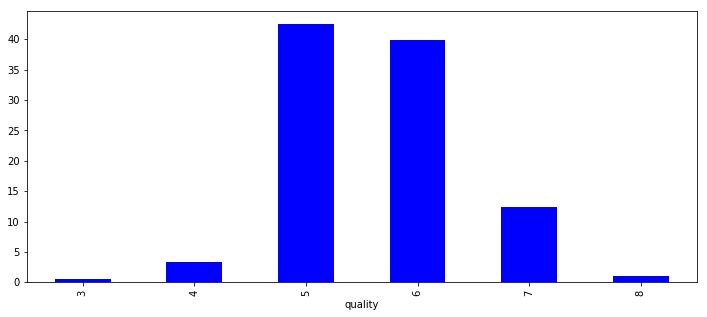

In [358]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = df_prop_wine[df_prop_wine['color'] == 'red'].iloc[:, 0].plot(kind='bar', color='b')

### Conclusões Definitivas

Após algumas aventuras e tentativas. Abaixo seguirão as conclusões definitivas sobre as análises de Vinho. Questões a serem respondidas:

* <b>P1: Existe um certo tipo de vinho (tinto ou branco) associado a uma melhor qualidade?</b>

Para esta pergunta, é necessário comparar a qualidade média do vinho tinto à qualidade média do vinho branco, com o groupby, agrupando por 'cor' e, depois, encontrando a qualidade média de cada grupo. </b>

* <b>P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?</b>

Essa pergunta é mais complicada porque, ao contrário da cor, que possui categorias claras pelas quais você pode agrupar (tinto ou branco), pH é uma variável quantitativa, sem categorias claras. No entanto, existe uma solução simples para isso. É possível criar uma variável categórica de uma variável quantitativa criando suas próprias categorias. A função [Cut do Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) permite que você “corte” os dados em grupos. Usando essa função, crie uma nova coluna chamada nível_acidez com essas categorias.

Níveis de acidez:
* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline 

df_wine = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-edited.csv')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
# Verificando qualidade média por tipo de vinho
df_wine.groupby('color').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
color,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


In [13]:
# Puxando coluna 'qualidade'
df_wine.groupby('color').mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [14]:
# Comunicando resultados
print(f'Qualidade média dos Vinhos Tinto: {df_wine.groupby("color").mean()["quality"][0]:.2f}')
print(f"Qualidade média dos Vinhos Branco: {df_wine.groupby('color').mean()['quality'][1]:.2f}")

Qualidade média dos Vinhos Tinto: 5.64
Qualidade média dos Vinhos Branco: 5.88


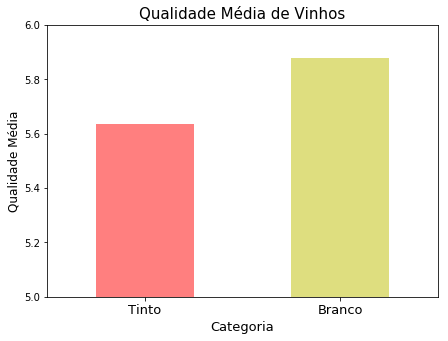

In [15]:
# Visão gráfica
fig, ax = plt.subplots(figsize=(7, 5))
ax = df_wine.groupby('color').mean()['quality'].plot(kind='bar', color=['r', 'y'], alpha=.5)
ax.set_title('Qualidade Média de Vinhos', fontsize=15)
ax.set_xlabel('Categoria', fontsize=13)
plt.xticks(np.arange(2), ['Tinto', 'Branco'], rotation='horizontal', fontsize=13);
ax.set_ylabel('Qualidade Média', fontsize=12)
ax.set_ylim(5, 6.0)
plt.show()

In [16]:
# Verificando níveis de acidez com .cut()
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Relembrando - Níveis de acidez:
* Alto: Abaixo de 25% dos valores de pH
* Moderadamente alto: 25% a 50% dos valores de pH
* Médio: 50% a 75% dos valores de pH
* Baixo: 75% ou mais dos valores de pH

In [17]:
# Testando cut
pd.cut(np.array([1, 2, 3, 4, 5, 6]), 3)

[(0.995, 2.667], (0.995, 2.667], (2.667, 4.333], (2.667, 4.333], (4.333, 6.0], (4.333, 6.0]]
Categories (3, interval[float64]): [(0.995, 2.667] < (2.667, 4.333] < (4.333, 6.0]]

A função <b>.cut</b> normalmente recebe como argumento um array (ou um objeto do tipo _Series_, ou seja, uma feature/coluna do DataFrame) e o número de "splits" de agrupamento de dados, ou seja, a quantidade de "faixas" ou "ranges" possíveis para classificação dos dados. Adicionalmente, também é possível nomear <b>labels</b> para classificação.

Perceba no exemplo acima que foram passados apenas dois argumentos para a função <b>cut</b>: um array e o número de agrupamentos. A função transformou o array e o agrupou de acordo com os ranges calculados automaticamente. Os dados foram agrupados em ranges:

* entre 0.995 e 2.667
* entre 2.667 e 4.333
* entre 4.333 e 6.000

Foram verficados cada um dos elementos do array [1, 2, 3, 4, 5, 6], agrupando-os no respectivo range, de acordo com seu valor. Em outras palavras, o número 1 (elemento 0) ficou agrupado no primeiro range (0.995 a 2.667), assim como o número 2 (elemento 1). Já o número 3 foi classificado no segundo range (2.667 a 4.333) e assim sucessivamente. Vejamos um exemplo real considerando a coluna "pH". Documentação: [Cut-Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html)

In [18]:
# Preparando cut
df_wine.describe()['ph']

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: ph, dtype: float64

In [19]:
df_wine.describe()['ph']['25%']

3.11

In [15]:
# Agora sim
phs = df_wine.describe()['ph']
bin_edges = [phs['min'], phs['25%'], phs['50%'], phs['75%'], phs['max']]
bin_edges

[2.72, 3.11, 3.21, 3.32, 4.01]

In [16]:
# labels
bin_names = ['Alto', 'Moderadamente Alto', 'Médio', 'Baixo']
bin_names

['Alto', 'Moderadamente Alto', 'Médio', 'Baixo']

In [17]:
# Aplicando cut
pd.cut(df_wine['ph'], bin_edges, labels=bin_names)

0                    Baixo
1       Moderadamente Alto
2                    Médio
3       Moderadamente Alto
4                    Baixo
5                    Baixo
6                    Médio
7                    Baixo
8                    Baixo
9                    Baixo
10                   Médio
11                   Baixo
12                   Baixo
13                   Médio
14      Moderadamente Alto
15      Moderadamente Alto
16                   Médio
17                    Alto
18                   Baixo
19                    Alto
20                   Baixo
21                   Baixo
22      Moderadamente Alto
23      Moderadamente Alto
24                   Baixo
25                   Baixo
26                   Médio
27      Moderadamente Alto
28                   Baixo
29                   Baixo
               ...        
6467                 Médio
6468    Moderadamente Alto
6469    Moderadamente Alto
6470                 Baixo
6471    Moderadamente Alto
6472                 Baixo
6

Funcionou! Porém, os dados foram alterados no DataFrame?


In [18]:
# Verificando alterações
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Não. É necessário incluir esta alteração através da criação de uma nova coluna chamada **acidity_level**.

In [19]:
# Antes de inserir, é de bom grado verificar se a quantidade de linhas são iguais
df_wine.shape[0] == pd.cut(df_wine['ph'], bin_edges, labels=bin_names).shape[0]

True

In [20]:
# Criando coluna e inserindo novos dados
df_wine['acidity_level'] = pd.cut(df_wine['ph'], bin_edges, labels=bin_names)

In [21]:
# Verificando
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderadamente Alto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Médio
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderadamente Alto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Baixo


In [22]:
# Salvando novo dataset
df_wine.to_csv('C:/Users/thiagoPanini/Downloads/datasets/winequality-cut-edited.csv', index=False)

Respondendo questão:

<b>P2: Qual nível de acidez (valor de pH) recebe a classificação média mais alta?</b>

In [11]:
df_wine.groupby('acidity_level').mean()['quality']

acidity_level
Alto                  5.783343
Moderadamente Alto    5.784540
Médio                 5.850832
Baixo                 5.859593
Name: quality, dtype: float64

In [28]:
print(f'pHs mais baixos proporcionam maiores notas de Qualidade.')

pHs mais baixos proporcionam maiores notas de Qualidade.


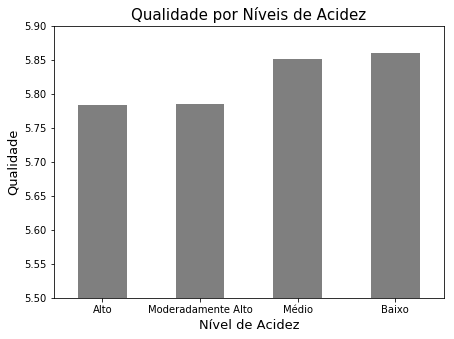

In [29]:
# Plotando gráfico
fig, ax = plt.subplots(figsize=(7, 5))
ax = df_wine.groupby('acidity_level').mean()['quality'].plot(kind='bar', color='k', alpha=.5)
ax.set_title('Qualidade por Níveis de Acidez', fontsize=15)
plt.xticks(rotation='horizontal')
ax.set_xlabel('Nível de Acidez', fontsize=13)
ax.set_ylabel('Qualidade', fontsize=13)
ax.set_ylim(5.5, 5.9)
plt.show()

**Vinhos com maior teor alcoólico recebem maiores notas?**

In [30]:
# Separando DataFrames pela mediana
median = df_wine['alcohol'].median()
median

10.3

In [31]:
# Separando dfs
low_alc = df_wine.query('alcohol < @median')
high_alc = df_wine.query('alcohol >= @median')

In [32]:
# Verificando
df_wine.shape[0] == (low_alc.shape[0] + high_alc.shape[0])

True

In [33]:
# Separando em variáveis para plotar
def bar_plot(tam_x, tam_y, colors, data, title, xlabel, ylabel, ylim):
    fig, ax = plt.subplots(figsize=(tam_x, tam_y))
    ax = data.plot(kind='bar', color=colors, alpha=.7)
    ax.set_title=title
    ax.set_xlabel=xlabel
    ax.set_ylabel=ylabel
    ax.set_ylim=ylim
    plt.xticks(rotation='horizontal')
    plt.show()

In [34]:
def plt_bar_plot(locations, heights, labels, title, xlabel, ylabel):
    plt.bar(locations, heights, tick_label=labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

AttributeError: 'list' object has no attribute 'plot'

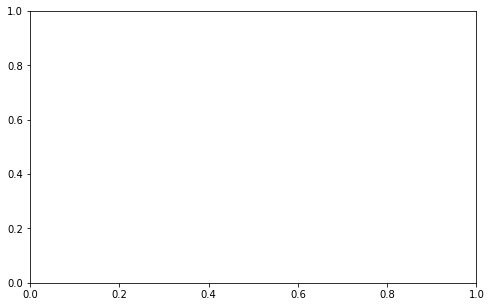

In [35]:
# Especificando variáveis
tam_x = 8
tam_y = 5
colors = 'k'
data = [low_alc, high_alc]
title='Nível Alcoólico e Qualidade'
xlabel='Nível Alcoólico'
ylabel='Qualidade'
ylim=(0, 10)

bar_plot(tam_x, tam_y, colors, data, title, xlabel, ylabel, ylim)

In [36]:
locations = [1, 2]
heights = [low_alc['quality'].mean(), high_alc['quality'].mean()]
labels = ['Baixo Teor', 'Alto Teor']
title = 'Índice de Qualidade por Teor Alcoólico'
xlabel = 'Teor Alcoólico'
ylabel = 'Qualidade'

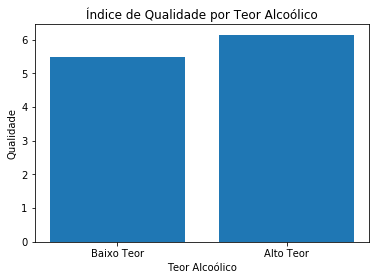

In [37]:
plt_bar_plot(locations, heights, labels, title, xlabel, ylabel)

**Nesta etapa, o desfio é dar continuidade nos testes realizados na sessão 1.3.3 e plotar um gráfico de barras comparando os índices de qualidade dos dois tipos de vinho, dadas as devidas proporções em cada uma das notas atribuídas**

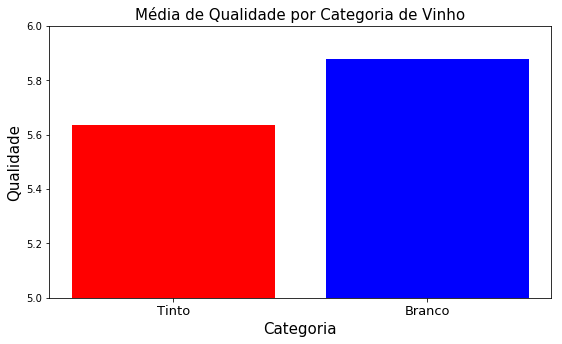

In [76]:
# Preparando plotagem - Média de Qualidade por Categoria
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title('Média de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Categoria', fontsize=15)
ax.set_ylabel('Qualidade', fontsize=15)
ax.bar([1, 2], df_wine.groupby('color').mean()['quality'], color=['red', 'blue'])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Tinto', 'Branco'], fontsize=13)
ax.set_ylim(5, 6.0)
plt.show()

O gráfico acima é bem interessante e consegue evidenciar que vinhos Brancos normalmente atingem notas maiores de qualidade. Entretanto, o objetivo neste ponto é comparar, nota a nota, a porcentagem obtida por cada uma das Categorias.

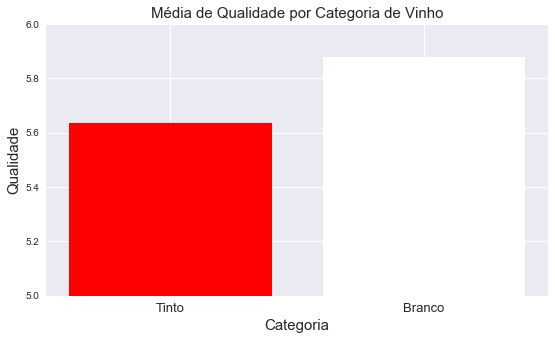

In [80]:
# Uma outra forma de deixar o gráfico acima mais apresentável seria através da biblioteca seaborn
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title('Média de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Categoria', fontsize=15)
ax.set_ylabel('Qualidade', fontsize=15)
ax.bar([1, 2], df_wine.groupby('color').mean()['quality'], color=['red', 'white'])
ax.set_xticks([1, 2])
ax.set_xticklabels(['Tinto', 'Branco'], fontsize=13)
ax.set_ylim(5, 6.0)
# ax.grid(False)
plt.show()

In [83]:
# Preparando plotagem de contagem por índice de qualidade por categoria
df_wine.groupby(['quality', 'color']).count()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 ph  sulphates  alcohol  acidity_level  
quality color                                           
3       red      10         10       10             10  
        white    20         20       20             20  
4       red      53         53       53             53  
        white   163        163      163            163  
5       red     681        681      681            681  
        white  1457       1457     1457           1457  
6       red     638        638      638            638  
        white  2198       2198     2198           2197  
7       red     199        199      199            199  
        white   880        880      880            880  
8       red      18         18       18             18  
        white   175        175      175            175  
9       white     5          5        5              5

In [84]:
# Trabalhando com proporção
100 * df_wine.groupby(['quality', 'color']).count() / df_wine.shape[0]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         0.153917          0.153917     0.153917        0.153917   
        white       0.307834          0.307834     0.307834        0.307834   
4       red         0.815761          0.815761     0.815761        0.815761   
        white       2.508850          2.508850     2.508850        2.508850   
5       red        10.481761         10.481761    10.481761       10.481761   
        white      22.425735         22.425735    22.425735       22.425735   
6       red         9.819917          9.819917     9.819917        9.819917   
        white      33.830999         33.830999    33.830999       33.830999   
7       red         3.062952          3.062952     3.062952        3.062952   
        white      13.544713         13.544713    13.544713       13.544713   
8       red         0.277051          0.277051     0.277051        0.277051   
        white       2.693551          2.693551     2.693551        2.693551   
9       white       0.076959          0.076959     0.076959        0.076959   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
quality color                                                         
3       red     0.153917             0.153917              0.153917   
        white   0.307834             0.307834              0.307834   
4       red     0.815761             0.815761              0.815761   
        white   2.508850             2.508850              2.508850   
5       red    10.481761            10.481761             10.481761   
        white  22.425735            22.425735             22.425735   
6       red     9.819917             9.819917              9.819917   
        white  33.830999            33.830999             33.830999   
7       red     3.062952             3.062952              3.062952   
        white  13.544713            13.544713             13.544713   
8       red     0.277051             0.277051              0.277051   
        white   2.693551             2.693551              2.693551   
9       white   0.076959             0.076959              0.076959   

                 density         ph  sulphates    alcohol  acidity_level  
quality color                                                             
3       red     0.153917   0.153917   0.153917   0.153917       0.153917  
        white   0.307834   0.307834   0.307834   0.307834       0.307834  
4       red     0.815761   0.815761   0.815761   0.815761       0.815761  
        white   2.508850   2.508850   2.508850   2.508850       2.508850  
5       red    10.481761  10.481761  10.481761  10.481761      10.481761  
        white  22.425735  22.425735  22.425735  22.425735      22.425735  
6       red     9.819917   9.819917   9.819917   9.819917       9.819917  
        white  33.830999  33.830999  33.830999  33.830999      33.815607  
7       red     3.062952   3.062952   3.062952   3.062952       3.062952  
        white  13.544713  13.544713  13.544713  13.544713      13.544713  
8       red     0.277051   0.277051   0.277051   0.277051       0.277051  
        white   2.693551   2.693551   2.693551   2.693551       2.693551  
9       white   0.076959   0.076959   0.076959   0.076959       0.076959

Percebe-se que em TODAS as notas o conjunto de Vinho Branco leva vantagem. Porém isto não representa a realidade, visto que há muito mais amostras classificadas como sendo Vinho Branco do que amostradas classificadas com Vinho Tinto

In [87]:
print('Amostras classificadas como Vinho Branco: {}'.format(df_wine.query('color == "white"').shape[0]))
print('Amostras classificadas como Vinho Tinto: {}'.format(df_wine.query('color == "red"').shape[0]))

Amostras classificadas como Vinho Branco: 4898
Amostras classificadas como Vinho Tinto: 1599


In [102]:
array = np.arange(0, len(data), 1)

In [103]:
len(data)

13

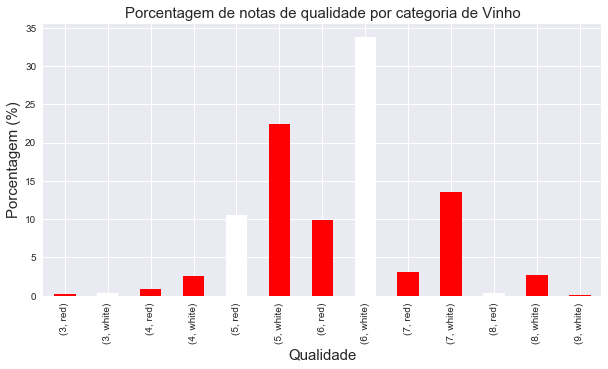

In [115]:
# Visualizando em formato gráfico
colors = ['red', 'white']
title = 'Porcentagem de notas de qualidade por categoria de Vinho'
locations = [1, 2]
data = 100 * df_wine.groupby(['quality', 'color']).count() / df_wine.shape[0]

fig, ax = plt.subplots(figsize=(10, 5))
ax = data['ph'].plot(kind='bar', color=colors)
ax.set_title(title, fontsize=15)
ax.set_xlabel('Qualidade', fontsize=15)
ax.set_ylabel('Porcentagem (%)', fontsize=15)
plt.show()

Apesar de estar aparentemente OK, o gráfico não reflete a realidade pois há mais amostras de Vinho Branco do que de Vinho Tinto, o que interefere diretamente na contagem. Para resolver este problema, é necessário trabalhar com a <b>proporção</b>, ou seja, realizar a contagem em cada categoria e dividir o valor pelo total.

In [118]:
df_wine.groupby('color').count()['ph']

color
red      1599
white    4898
Name: ph, dtype: int64

In [122]:
# Dados
colors = ['red', 'white'] * 6
title = 'Porcentagem de notas de qualidade por categoria de Vinho'
x = 'Qualidade'
y = 'Porcentagem (%)'
contagem = df_wine.groupby(['quality', 'color']).count()['ph'] # Total de cada uma das categorias
total = df_wine.groupby('color').count()['ph']
prop = 100 * contagem / total

In [125]:
# Melhorando gráfico

def plot_wine_quality(dados, eixo_x, eixo_y, titulo, cores):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = dados.plot(kind='bar', color=cores)
    ax.set_title(titulo, fontsize=15)
    ax.set_xlabel(eixo_x, fontsize=15)
    ax.set_ylabel(eixo_y, fontsize=15)
    plt.show()

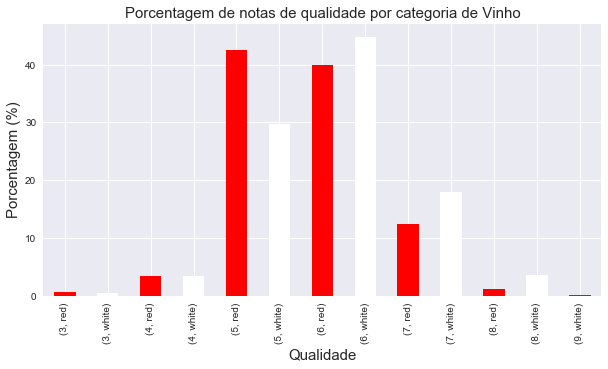

In [126]:
plot_wine_quality(prop, x, y, title, colors)

Apesar de estar bem melhor, há alguns pontos a se destacar nesse gráfico.

<b>Análise</b>

* Nas menores classificações (3, 4 e 5), amostras de Vinho Tinto possuem uma maior proporção.
* Em contrapartida, em classificações maiores (6, 7, 8 e 9), amostras de Vinho Branca marcam uma maior presença.

<b>Melhorias</b>

* Rótulos no eixo x se encontram bagunçados
* Seria interessante colocar as barras das respectivas categorias umas do lado das outras
* Não há espaço para amostras de Vinho Tinto com índice de qualidade = 9 (apesar deste número ser 0, deveria constar no gráfico)

*Como há muita customização inclusa, seria muito mais interessante plotar este gráfico diretamente no matplotlib ao invés do pandas*

In [24]:
# Contagem para cada avaliação de vinho
color_counts = df_wine.groupby(['color', 'quality']).count()['ph']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: ph, dtype: int64

In [25]:
# Contagem total para cada tipo de vinho
color_total = df_wine.groupby('color').count()['ph']
color_total

color
red      1599
white    4898
Name: ph, dtype: int64

In [26]:
# Obtendo proporções de cada um dos tipos de vinhos
red_proportion = color_counts['red'] / color_total['red']
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: ph, dtype: float64

In [28]:
# Repetindo para Vinho Branco
white_proportion = color_counts['white'] / color_total['white']
white_proportion

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: ph, dtype: float64

In [30]:
# Inserindo valor 0 para notas 9 do Vinho Tinto - Isto é necessário para manter igualdade entre os dados
red_proportion['9'] = 0
red_proportion

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: ph, dtype: float64

In [32]:
# Definindo parâmetros do gráfico
ind = np.arange(len(red_proportion)) # Localização das barras
width = .35 # Largura das barras

ind

array([0, 1, 2, 3, 4, 5, 6])

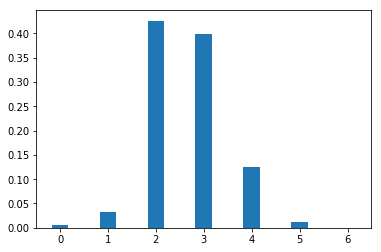

In [34]:
# Plotando barras - Preview
red_bars = plt.bar(ind, red_proportion, width)

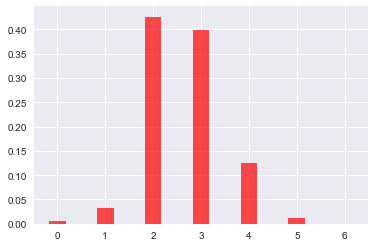

In [35]:
# Continuando
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')

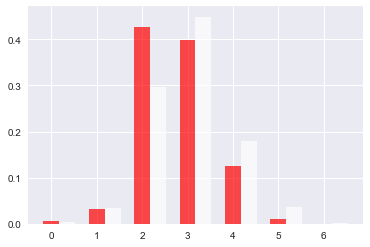

In [36]:
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')

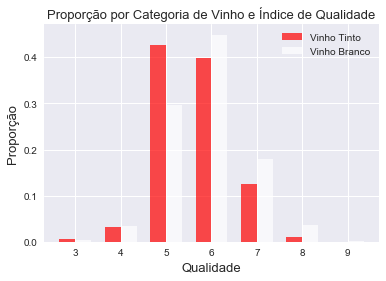

In [38]:
# Plotagem final
sns.set()
red_bars = plt.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
white_bars = plt.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')

plt.ylabel('Proporção', fontsize=13)
plt.xlabel('Qualidade', fontsize=13)
plt.title('Proporção por Categoria de Vinho e Índice de Qualidade', fontsize=13)
locations = ind + width / 2 # localização dos marcadores no eixo x
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)
plt.legend()
plt.show()

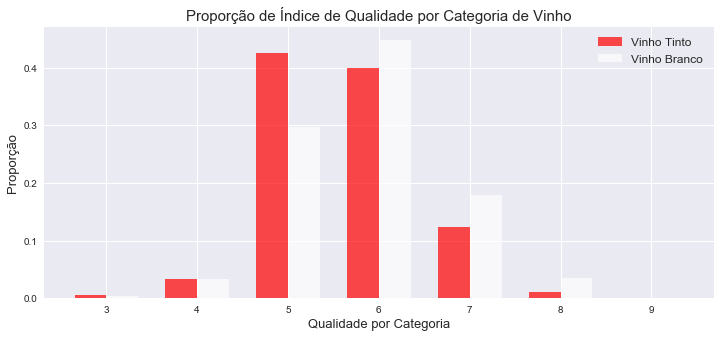

In [46]:
# Testando por fig, ax

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(ind, red_proportion, width, color='r', alpha=.7, label='Vinho Tinto')
ax.bar(ind + width, white_proportion, width, color='w', alpha=.7, label='Vinho Branco')
ax.set_title('Proporção de Índice de Qualidade por Categoria de Vinho', fontsize=15)
ax.set_xlabel('Qualidade por Categoria', fontsize=13)
ax.set_ylabel('Proporção', fontsize=13)
locations = ind + width / 2
labels = ['3', '4', '5', '6', '7', '8', '9']
plt.xticks(locations, labels)
plt.legend(fontsize=12)
plt.show()

## Car Test: Economia de Combustível

Em um segundo estudo de caso mais desafiador, a Agência de Proteção Ambiental dos EUA providencia dados relacionados a um estudo de economia de combustível de acordo com diversos modelos de carros, cada qual com seus atributos característicos. Anualmente estes dados são mostrados ao governo e servem como guia para economia de combustívei no geral.

### Entendendo os Dados

A Agência de Proteção Ambiental dos Estados Unidos divulga, periodicamente, dados de economia de combustível coletados a partir de diveresos testes envolvendo diferentes modelos de carros, cada qual com sua característica. Neste estudo de caso, os principais pontos abordados envolvem o tratamento de duas bases, sendo a primeira referente a testes realizados em <b>2008</b> e, a segunda, relacionada a testes realizados em <b>2018</b>.

Link para maiores explicações: https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

Explicações sobre significado de *SmartVehicle*: https://www.epa.gov/greenvehicles/consider-smartway-vehicle

PDF importante a respeito dos atributos tratados: https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf

<b>Entendendo os dados</b>

* *Model* - Fabricante e modelo do veículo
* *Displ* - Deslocamento do motor - o tamanho de um motor em litros
* *Cyl* - O número de cilindros de um motor específico
* *Trans* - Tipo de transmissão e número de marchas
* *Drive* -	Tipo de eixo de tração (2WD = tração em 2 rodas, 4WD = tração nas 4 rodas)
* *Fuel* - Tipo de combustível
* *Cert Region*' - Código da região de certificação
* *Área de vendas*'' - Código da região de certificação
* *Stnd* - Código de normas para emissões de veículos (veja as normas para emissão de veículos aqui)
* *Stnd Description*' -	Descrição das normas para emissões de veículos
* *Underhood ID* -	Número de identificação de 12 dígitos encontrado na etiqueta de emissão sob o capô de todos os veículos. É uma exigência da EPA designar seu “grupo de teste” ou “família do motor”. Isso é explicado em mais detalhes aqui
* *Veh Class* -	Classe do veículo na EPA
* *Air Pollution Score* - Pontuação de poluição do ar (classificação de emissão)
* *City MPG* - Mpg estimado na cidade (milhas/galão)
* *Hwy MPG* - Mpg estimado na estrada (milhas/galão)
* *Cmb MPG* - Mpg combinado estimado (milhas/galão)
* *Greenhouse Gas Score* - Classificação de emissão de gases do efeito estufa
* *SmartWay* - Sim, Não ou Elite
* *Comb CO2*' -	Emissões de CO2 cidade/estrada combinados em gramas por milha

*' Não incluídos no conjunto de dados de 2008*

*'' Não incluídos no conjunto de dados de 2018*

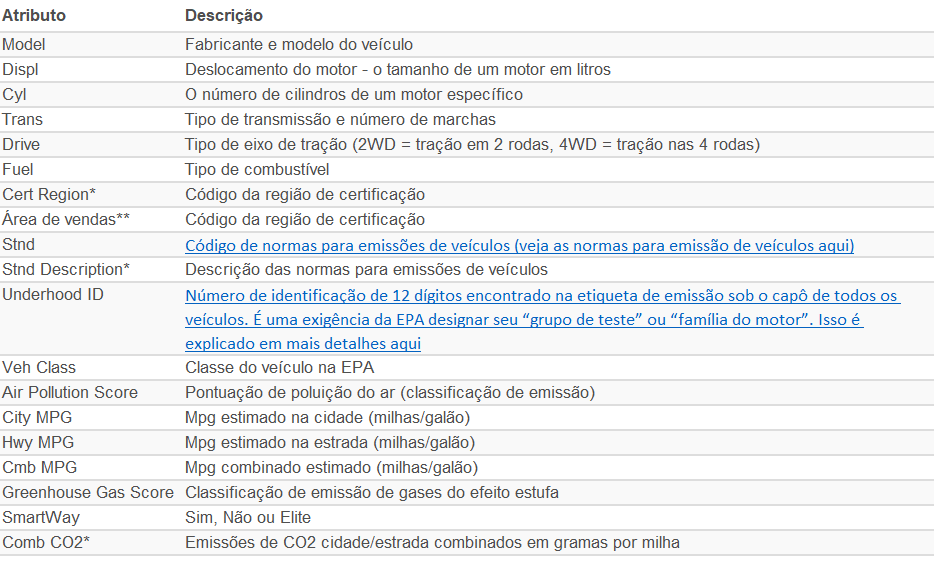

### Avaliando os Dados


In [47]:
# Importando pandas e lendo arquivos
import pandas as pd

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18.csv')

In [48]:
# Dados de análises feitas em 2008
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [53]:
# Dados provenientes de análises de 2018
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [54]:
# Contagem de linhas e colunas
print(f'Estudo de 2008: {df_08.shape[0]} linhas e {df_08.shape[1]} colunas.')
print(f'Estudo de 2018: {df_18.shape[0]} linhas e {df_18.shape[1]} colunas.')

Estudo de 2008: 2404 linhas e 18 colunas.
Estudo de 2018: 1611 linhas e 18 colunas.


In [72]:
# Há dados nulos?
df_08.isnull().values.sum()

1685

In [56]:
df_18.isnull().values.any()

True

In [78]:
# Comunicando
print(f'Conjunto de 2008: {df_08.isnull().sum().max()} dados nulos.')
print(f'Conjunto de 2018: {df_18.isnull().sum().max()} dados nulos.')

Conjunto de 2008: 199 dados nulos.
Conjunto de 2018: 2 dados nulos.


In [75]:
# Há dados duplicados?
df_08.duplicated().values.any()

True

In [76]:
df_18.duplicated().values.any()

False

In [77]:
# Comunicando
print(f'Conjunto de 2008: {df_08.duplicated().values.sum()} dados duplicados.')
print(f'Conjunto de 2018: {df_18.duplicated().values.sum()} dados duplicados.')

Conjunto de 2008: 25 dados duplicados.
Conjunto de 2018: 0 dados duplicados.


In [79]:
# Verificando tipos de dados
print('Conjunto de 2008:')
df_08.dtypes

Conjunto de 2008:


Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [80]:
print('Conjunto de 2018: ')
df_18.dtypes

Conjunto de 2018: 


Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

Há uma grande quantidade de dados salvos como `str` e isso precisa ser modificado. Na sessão de Preparação dos Dados estes casos serão tratados.

In [81]:
# Verificando pontos adicionais

# Dados únicos de algumas colunas
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [86]:
df_08['Veh Class'].value_counts()

small car          692
SUV                648
pickup             350
midsize car        276
large car          129
van                129
station wagon      123
minivan             37
special purpose     20
Name: Veh Class, dtype: int64

In [87]:
df_18['Fuel'].value_counts()

Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

Pontos destacados:
* Renomear colunas na forma padrão e excluir excedentes;
* Filtrar dados de acordo com objetivo;
* Remover dados missing;
* Remover dados duplicados;
* Transformar tipos de dados;
* Garantir que ambos os DataFrames possuam as mesmas colunas com os mesmos nomes;
* Excluir colunas (drop) irrelevantes para a análise.

### Preparando Dados

Colocando em prática os tópicos levantados na sessão de Avaliação dos Dados, o primeiro passo é renomear colunas e remover atributos irrelevantes. Para a análise proposta, entende-se por atributos irrelevantes:

* Do conjunto de dados de 2008: *'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'*
* Do conjunto de dados de 2018: *'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'*

In [88]:
# Verificações antes da exclusão
df_08.shape

(2404, 18)

In [89]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [93]:
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [94]:
# Removendo colunas
drop_08 = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
df_08.drop(drop_08, axis=1, inplace=True)

In [95]:
# Verificações
df_08.shape

(2404, 14)

In [96]:
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [97]:
# Realizando mesmo procedimento com dados de 2018
df_18.shape

(1611, 18)

In [98]:
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386


In [99]:
drop_18 = ['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2']
df_18.drop(drop_18, axis=1, inplace=True)
df_18.shape

(1611, 14)

In [100]:
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [109]:
# Renomeando colunas com função .rename()
# 1 - Sales Area em 2008 deveria ser Cert Region (assim como em 2018)
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [110]:
# Agora é possível aplicar o rename em todas as colunas para deixa-las no formato "padrão"
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [111]:
# Renomeando
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [112]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [114]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


**Filtrando e removendo dados nulos e duplicados**

In [115]:
# Filtro para captar apenas carros certificados na California (cert_region == CA)
df_08['cert_region'].value_counts()

FA    1157
CA    1084
FC     163
Name: cert_region, dtype: int64

In [116]:
df_18['cert_region'].value_counts()

FA    813
CA    798
Name: cert_region, dtype: int64

In [118]:
# Realizando procedimento com .query()
df_08.query('cert_region == "CA"', inplace=True)
df_18.query('cert_region == "CA"', inplace=True)

In [121]:
# Verificando alterações
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [122]:
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [125]:
# Removendo nulos
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
cert_region              0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [126]:
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [127]:
# Aplicando função .dropna
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [129]:
# Verificando
print(f'Há dados nulos no conjunto de 2008?\nR: {df_08.isnull().values.any()}')
print(f'Há dados nulos no conjunto de 2018?\nR: {df_18.isnull().values.any()}')

Há dados nulos no conjunto de 2008?
R: False
Há dados nulos no conjunto de 2018?
R: False


In [130]:
# Removendo dados duplicados
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [131]:
# Verificando
print(f'Há dados duplicados no conjunto de 2008?\nR: {df_08.duplicated().any()}')
print(f'Há dados duplicados no conjunto de 2018?\nR: {df_18.duplicated().any()}')

Há dados duplicados no conjunto de 2008?
R: False
Há dados duplicados no conjunto de 2018?
R: False


In [132]:
# Salvando alterações
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv', index=False)

**Modificando tipos de dados**

In [209]:
# Verificando tipos de dados em cada um dos datasets
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [210]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

<b>Tarefas:</b>

<b>Ajustando tipo de dados “cyl.”</b>
* 2008: extrair int da string.
* 2018: transformar float em int.

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

<b>Ajustar tipos de dados “city_mpg”, “hwy_mpg” e “cmb_mpg”</b>
* 2008 e 2018: transformar string em float.

<b>Ajustar tipo de dados “greenhouse_gas_score”</b>
* 2008: transformar float em int.

In [211]:
# Ajustando coluna cyl - 2008
df_08['cyl'][0]

'(6 cyl)'

In [212]:
# Extraindo número inteiro através da função .str.extract
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


Referência: https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas

In [213]:
df_08['cyl'][0]

6

In [214]:
type(df_08['cyl'][0])

numpy.int32

In [215]:
# Ajustando coluna cyl - 2018
df_18['cyl'][1]

6.0

In [216]:
type(df_18['cyl'][1])

numpy.float64

In [217]:
df_18['cyl'] = df_18['cyl'].astype(int)

In [218]:
type(df_18['cyl'][1])

numpy.int32

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

In [219]:
# Facilitando
apc = 'air_pollution_score'
print(f'Antes da conversão - Tipo: {type(df_08[apc][0])}')
df_08[apc] = df_08[apc].astype(float)
print(f'Depois da conversão - Tipo: {type(df_08[apc][0])}')

Antes da conversão - Tipo: <class 'str'>


ValueError: could not convert string to float: '6/4'

Aparentemente foi encontrado um erro peculiar. A mensagem diz que não foi possível converter a string "6/4" em `float`. Parece que há alguns dados 'estranhos' no Dataset. Investigando...

In [220]:
# Como está a coluna air_pollution_score?
df_08[apc].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [221]:
# Verificando linha do referido elemento
x = (df_08[apc] == '6/4').values
np.where(x == True)

(array([582], dtype=int64),)

Referências:
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
* https://stackoverflow.com/questions/18079029/index-of-element-in-numpy-array

In [222]:
# Verificando a linha em questão
df_08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
cert_region                             CA
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 582, dtype: object

<b>Não é só o nível de poluição do ar a ter dados "duplos"!</b>

As colunas mpg e os nível de gases de efeito estufa também parecem ter o mesmo problema - talvez seja por isso que todos eles foram salvos como strings! Segundo [este link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), que eu encontrei na documentação em PDF:

    "Se um veículo pode operar com mais de um tipo de combustível, uma estimativa é fornecida para cada tipo de combustível."
    
Ahh.. então todos veículos com mais de um tipo de combustível, ou híbridos, como aquele visto acima (que usa etanol E gás) terão uma string que armazena dois valores - um para cada. Isto é um pouco complicado, então eu vou mostrar como fazê-lo com o conjunto de dados de 2008, para você então tentar fazer o mesmo com o conjunto de dados de 2018.

In [223]:
# Quando há mais de um combustível, há dados duplos
df_08['fuel'].value_counts()

Gasoline       984
ethanol/gas      1
CNG              1
Name: fuel, dtype: int64

In [224]:
# Series a ser usada como máscara para selecionar carros híbridos (mais de um combustível)
df_08['fuel'].str.contains('/')

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
956    False
957    False
958    False
959    False
960    False
961    False
962    False
963    False
964    False
965    False
966    False
967    False
968    False
969    False
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
Name: fuel, Length: 986, dtype: bool

In [225]:
# Obtendo carros híbridos de 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [226]:
# Em 2008 há apenas 1 carro híbrido. E em 2018?
df_18['fuel'].str.contains('/').values.sum()

38

In [227]:
# Obtendo carros híbridos de 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No


Neste momento, deve-se **Splitar** ou **Separar** os DataFrames em dois novos conjuntos contendo, cada qual, informações anteriores e posteriores às barras.

In [228]:
# Criando cópias dos DataFrames para posterior separação
df1_08 = hb_08.copy()
df2_08 = hb_08.copy()
df1_18 = hb_18.copy()
df2_18 = hb_18.copy()

In [229]:
# Verificando como funciona o split
df1_08['fuel']

582    ethanol/gas
Name: fuel, dtype: object

In [231]:
df1_08['fuel'][582]

'ethanol/gas'

In [232]:
df1_08['fuel'][582].split('/')

['ethanol', 'gas']

In [233]:
print(f'Primeiro elemento: {df1_08["fuel"][582].split("/")[0]}')
print(f'Segundo elemento: {df1_08["fuel"][582].split("/")[1]}')

Primeiro elemento: ethanol
Segundo elemento: gas


Repetir a ideia do procedimento acima para as demais colunas.

In [234]:
# Função para separar os dados
def spliting_df(df1, df2, columns):
    for col in columns:
        df1[col] = df1[col].apply(lambda x: x.split('/')[0])
        df2[col] = df2[col].apply(lambda x: x.split('/')[1])

In [235]:
# Verificando colunas a serem splitadas no DataFrame de 2008
hb_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [236]:
# Salvando colunas
columns_08 = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

In [237]:
# Verificando colunas a serem splitadas no DataFrame de 2018
hb_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes


In [238]:
# Salvando colunas
columns_18 = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

In [239]:
# Aplicando função aos Datasets (2008)
spliting_df(df1_08, df2_08, columns_08)

In [240]:
# Verificando resultado
df1_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [241]:
df2_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [242]:
hb_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


Perfeito! Repetindo processo para o conjunto de 2018.

In [243]:
spliting_df(df1_18, df2_18, columns_18)

In [244]:
# Verificando
df1_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,CA,small car,3,28,34,30,10,Yes


In [245]:
df2_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,3,66,78,71,10,Yes


In [246]:
hb_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes


Muito bem. O próximo passo é unir os DataFrames para depois colocá-los novamente ao conjunto original.

In [247]:
# Novas linhas splitadas
df_08_new_rows = df1_08.append(df2_08)
df_18_new_rows = df1_18.append(df2_18)

In [248]:
# Verificando append por quantidade de linhas
print(f'Conjunto de 2008 - Número de linhas batem?\nR: {df_08_new_rows.shape[0] == df1_08.shape[0] + df2_08.shape[0]}')
print(f'Conjunto de 2018 - Número de linhas batem?\nR: {df_18_new_rows.shape[0] == df1_18.shape[0] + df2_18.shape[0]}')

Conjunto de 2008 - Número de linhas batem?
R: True
Conjunto de 2018 - Número de linhas batem?
R: True


In [249]:
# Antes de conerter, é necessário eliminar as linhas originais que causavam problema
df_08.drop(hb_08.index, inplace=True)
df_18.drop(hb_18.index, inplace=True)

In [250]:
# Verificando linhas dos conjuntos originais antes da junção
print(f'2008: {df_08.shape[0]} linhas.\n2018: {df_18.shape[0]} linhas.')

2008: 985 linhas.
2018: 756 linhas.


In [251]:
# Realizando junção com os conjuntos originais.
df_08 = df_08.append(df_08_new_rows)
df_18 = df_18.append(df_18_new_rows)

In [252]:
# Verificando linhas após a junção
print(f'2008: {df_08.shape[0]} linhas.\n2018: {df_18.shape[0]} linhas.')

2008: 987 linhas.
2018: 832 linhas.


In [253]:
# Verificando 2018 - linhas de df_18_new_rows devem ser iguais a 870 - 784
(870-794) == df_18_new_rows.shape[0]

True

In [254]:
# Por fim, voltando à tarefa original, pode-se converter air_pollution_score tranquilamente
type(df_08[apc][0])

str

In [255]:
# Convertendo 
df_08[apc] = df_08[apc].astype(float)
df_18[apc] = df_18[apc].astype(float)

**Ajustar tipos de dado “city_mpg”, “hwy_mpg” e “cmb_mpg”**

* 2008 e 2018: transformar string em float.

In [257]:
# Convertendo
convert_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

def string_to_float(df, cols):
    for c in cols:
        df[c] = df[c].astype(float)

string_to_float(df_08, convert_columns)
string_to_float(df_18, convert_columns)

In [258]:
# Verificando
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [259]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

**Ajustar tipo de dado “greenhouse_gas_score”**
* 2008: transformar float em int.

In [260]:
ggc = 'greenhouse_gas_score'
df_08[ggc] = df_08[ggc].astype(int)
df_18[ggc] = df_18[ggc].astype(int)

In [265]:
print(f'Tipo ggc 2008: {type(df_08[ggc][0])}')
print(f'Tipo ggc 2018: {type(df_18[ggc][1])}')

Tipo ggc 2008: <class 'numpy.int32'>
Tipo ggc 2018: <class 'numpy.int32'>


In [266]:
# Verificações finais
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [267]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [268]:
# Salvando alterações
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv', index=False)

### Exploração Gráfica

In [1]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv')

Link essencial: https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html

**Visão 1:** Distribuição de emissão de Gases Efeito Estufa (ggc) nos dois anos alvos da análise

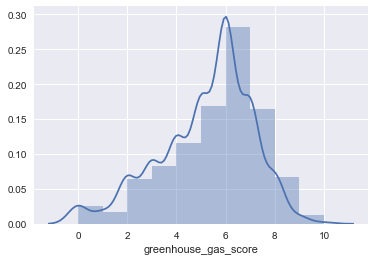

In [39]:
# Plotando 2008
ggc = 'greenhouse_gas_score'
sns.set()
sns.distplot(df_08[ggc], bins=10);

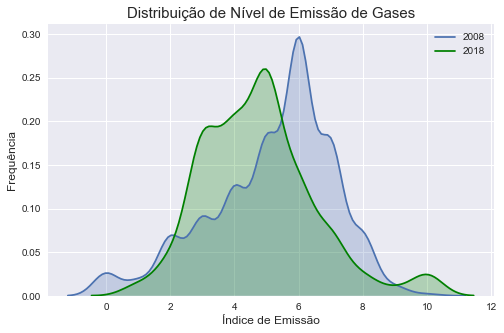

In [34]:
# Plotando gráficos com Seaborn - KDE
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(df_08[ggc], shade=True, label='2008');
sns.kdeplot(df_18[ggc], shade=True, label='2018', color='g');
ax.set_title('Distribuição de Nível de Emissão de Gases', fontsize=15)
ax.set_xlabel('Índice de Emissão', fontsize=12)
ax.set_ylabel('Frequência', fontsize=12)
plt.show()

Explicações sobre kde (distribuição não parametrizada): http://seaborn.pydata.org/tutorial/distributions.html

*Conclusão*: A partir da distribuição kde não parametrizada plotada acima, é possível inferir que os veículos de 2018 submetidos ao teste geralmente emitem menos gases de efeito estufa.

**Visão 2:** Distribuição de economia de combustível (comb_mpg) nos dois anos alvos da análise. Lembrando que a variável `comb_mpg` representa um gasto combinado de *milhas por galão*, o que seria, traduzindo à realidade brasileira, seria uma espécie de *km por litro* de combustível.

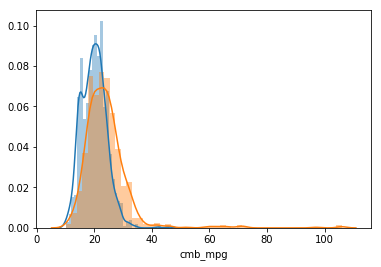

In [3]:
# Plotando visões com seaborn
sns.distplot(df_08['cmb_mpg']);
sns.distplot(df_18['cmb_mpg']);

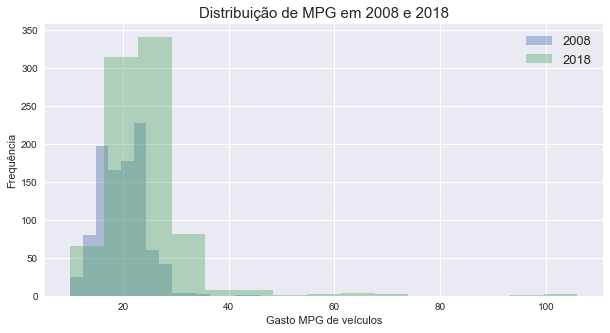

In [30]:
# Aprimorando plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.distplot(df_08['cmb_mpg'], kde=False, bins=15, label='2008')
sns.distplot(df_18['cmb_mpg'], kde=False, bins=15, label='2018')
ax.set_title('Distribuição de MPG em 2008 e 2018', fontsize=15)
ax.set_ylabel('Frequência')
ax.set_xlabel('Gasto MPG de veículos')
plt.legend(fontsize=13)
plt.show()

*Conclusões:* Veículos de 2018 conseguem realizar trajetos maiores com uma menor quantidade de combustível, ou seja, possuem um maior índice de MPG (Km/L). Isso pode ser explicado pelo surgimento e adaptação de uma grande quantidade de veículos elétricos e movidos a fontes alternativas de energia, fato que, em 2008, era pouco presente.

**Visão 3:** Há correlação entre as variáveis `cyl` (cilindradas do veículo) e `greenhouse_gas_score` (índice de emissão de gases efeito estufa)?

Text(0,0.5,'Cilindradas')

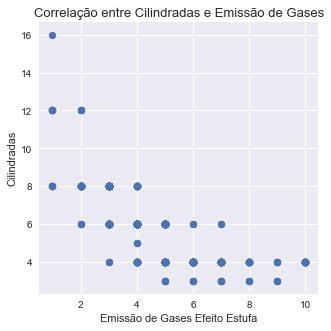

In [37]:
ggc = 'greenhouse_gas_score'

# Plotando via matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=df_18[ggc], y=df_18['cyl'])
ax.set_title('Correlação entre Cilindradas e Emissão de Gases', fontsize=13)
ax.set_xlabel('Emissão de Gases Efeito Estufa')
ax.set_ylabel('Cilindradas')

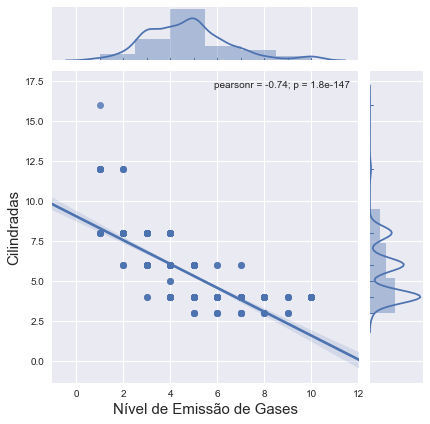

In [57]:
# PLotando via Seaborn
sns.jointplot(x=ggc, y='cyl', data=df_18, kind='reg', marginal_kws=dict(bins=6, rug=True));
plt.ylabel('Cilindradas', fontsize=15)
plt.xlabel('Nível de Emissão de Gases', fontsize=15)
#plt.yticks(np.arange(0, 11, 2.5))
plt.show()

*Conclusão*: Há uma correlação negativa entre o Nível de Emissão de Gases Efeito Estuda e o valor de Cilindradas do veículo. Quanto maior o valor de Cilindradas, menor o nível de emissão de gases.

### Conclusões Definitivas

Após a visualização de algumas relações através de funcionalidades gráficas, entende-se por Conclusões Definitivas o caminho para resposta de algumas perguntas

In [58]:
# Importando bibliotecas e lendo arquivos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-editedtypes.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-editedtypes.csv')

<b>Q1: Existem mais modelos únicos usando fontes alternativas de combustível? Em qual proporção?</b> 

In [59]:
# Realizando testes com veículos e tipos de combustível
df_08['fuel'].unique()

array(['Gasoline', 'CNG', 'ethanol', 'gas'], dtype=object)

In [61]:
df_08['fuel'].value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [62]:
df_18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [71]:
def calc_fuel_prop(df):
    total = df.shape[0]
    for fuel in df['fuel'].unique():
        print('Combustível: {} - Quantidade: {:.5f}%'.format(
                        fuel, 100*df.query('fuel == @fuel')['fuel'].count()/total))

In [74]:
print('Proporções em 2008:')
calc_fuel_prop(df_08)
print()
print('Proporções em 2018:')
calc_fuel_prop(df_18)

Proporções em 2008:
Combustível: Gasoline - Quantidade: 99.69605%
Combustível: CNG - Quantidade: 0.10132%
Combustível: ethanol - Quantidade: 0.10132%
Combustível: gas - Quantidade: 0.10132%

Proporções em 2018:
Combustível: Gasoline - Quantidade: 90.02404%
Combustível: Diesel - Quantidade: 2.28365%
Combustível: Ethanol - Quantidade: 3.12500%
Combustível: Electricity - Quantidade: 1.44231%
Combustível: Gas - Quantidade: 3.12500%


Resposta: Houve um aumento efetivo na utilização de fontes renováveis de combustível em 10 anos.

<b>Q2: Qual foi o nível de melhoria das classes de veículo no quesito "economia de combustível"?</b>

In [76]:
# Economia de combustível = cmb_mpg
df_08['cmb_mpg'].mean()

19.78824721377913

In [77]:
df_18['cmb_mpg'].mean()

24.030048076923077

In [79]:
# Referendando por classe
df_08['veh_class'].unique()

array(['SUV', 'midsize car', 'small car', 'station wagon', 'large car',
       'minivan', 'van', 'pickup'], dtype=object)

In [81]:
# Talvez o groupby ajude
df_08.groupby('veh_class').mean()['cmb_mpg']

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [82]:
# Em 2018...
df_18.groupby('veh_class').mean()['cmb_mpg']

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [84]:
# Entretanto, deve-se comparar apenas classes de 2018 que TAMBÉM estão presentes em 2008
columns = [x for x in df_18['veh_class'].unique() if x in df_08['veh_class'].unique()]
columns

['small car', 'midsize car', 'large car', 'station wagon', 'pickup', 'minivan']

In [95]:
df_08_vclass = df_08.query('veh_class == @columns').groupby('veh_class').mean()['cmb_mpg']
df_08_vclass

veh_class
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
Name: cmb_mpg, dtype: float64

In [96]:
df_18_vclass = df_18.query('veh_class == @columns').groupby('veh_class').mean()['cmb_mpg']
df_18_vclass

veh_class
large car        23.409091
midsize car      27.884058
minivan          20.800000
pickup           18.589744
small car        25.421053
station wagon    27.529412
Name: cmb_mpg, dtype: float64

In [102]:
for i, v in df_18_vclass.items():
    print(i, v)

large car 23.40909090909091
midsize car 27.884057971014492
minivan 20.8
pickup 18.58974358974359
small car 25.42105263157895
station wagon 27.529411764705884


In [107]:
len(df_18_vclass.index)

6

In [117]:
# Agora a função já pode ser preparada
def compare_vclass(df1, df2):
    print('Evolução do índice Km/L em 10 anos.\n')
    i = 0
    while i < len(df1.index):
        print('Modelo: {}'.format(df1.index[i]))
        print('2008: {:.2f}\n2018: {:.2f}'.format(df1[i], df2[i]))
        i += 1

compare_vclass(df_08_vclass, df_18_vclass)

Evolução do índice Km/L em 10 anos.

Modelo: large car
2008: 18.51
2018: 23.41
Modelo: midsize car
2008: 21.60
2018: 27.88
Modelo: minivan
2008: 19.12
2018: 20.80
Modelo: pickup
2008: 16.28
2018: 18.59
Modelo: small car
2008: 21.11
2018: 25.42
Modelo: station wagon
2008: 22.37
2018: 27.53


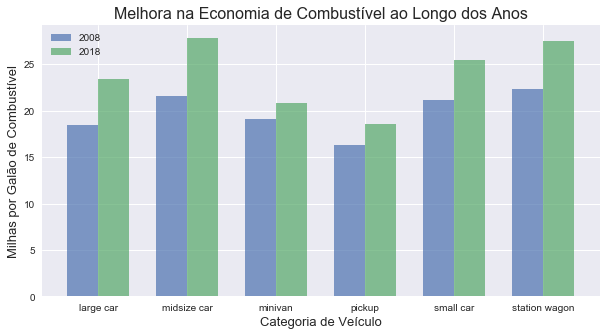

In [131]:
# É possível plotar isso graficamente
ind = np.arange(len(df_18_vclass))
width = .35

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(ind, df_08_vclass, width, alpha=.7, label='2008')
ax.bar(ind+width, df_18_vclass, width, alpha=.7, label='2018')
ax.set_title('Melhora na Economia de Combustível ao Longo dos Anos', fontsize=16)
ax.set_xlabel('Categoria de Veículo', fontsize=13)
ax.set_ylabel('Milhas por Galão de Combustível', fontsize=13)
locations = ind + width / 2
labels = df_18_vclass.index
plt.xticks(locations, labels)
plt.legend()
plt.show()

## Titanic: Probabilidade de Sobrevivência

### Avaliando os Dados

In [81]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Verificando dimensões
print(f'O DataFrame Titanic possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O DataFrame Titanic possui 891 linhas e 12 colunas.


In [4]:
# Verificando tipos primitivos
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

De acordo com o significado de cada uma das colunas do Dataset, não será necessária nenhuma transformação nos tipos de dados.

In [9]:
# Verificando dados missing
df.isnull().values.any()

True

In [10]:
# Comunicando
print(f'Há dados faltantes neste Dataset?\nR: {df.isnull().values.any()}')

Há dados faltantes neste Dataset?
R: True


In [69]:
# Dados nulos 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**1)** É notório que a coluna *Cabin* possui a situação mais crítica: 687 dos 891 dados estão faltando. Porém, trata-se de uma coluna que, a princípio, não possui relevância para a análise de dados proposta, fato este que leva a manutenção desta coluna e a não exclusão de seus registros faltantes.

**2)** Coluna Age também apresenta problemas. São 177 dados faltantes que precisam ser tratados de alguma forma, visto que esta feature pode ser muito importante para análises futuras.

**3)** Embarked apresenta 2 valores faltantes. Investigar se há uma relação entre ambos e se é possível deduzir em qual porto estas duas instâncias embarcaram.

In [12]:
# Outra abordagem para dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
# Verificando dados duplicados
df.duplicated().any()

False

Não há dados duplicados, logo, não é necessário nenhum procedimento posterior para exclusão (ou não) dos registros.

In [14]:
# Valores únicos em cada coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Preparando os Dados

In [54]:
# Visualizando algumas estatísticas de dados numéricos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
# Visualizando novamente o head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Percebe-se que a coluna **PassengerId** poderia muito bem se tornar o índice do DataFrame

In [56]:
# Transformando coluna PassengerId em índice

In [83]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# Verificando dados nulos
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [76]:
# Tratando dados da coluna Age
df['Age'].isnull().sum()

177

In [77]:
media = df['Age'].mean()
media

29.69911764705882

In [78]:
df['Age'].max()

80.0

In [79]:
df['Age'].min()

0.42

In [80]:
df['Age'].median()

28.0

In [81]:
# Características do atributo Age
print(f'Média de idades: {df["Age"].mean():.1f} anos.')
print(f'Mediana de idades: {df["Age"].median():.2f} anos.')
print(f'Maior idade encontrada: {df["Age"].max()} anos.')
print(f'Menor idade encontrada: {df["Age"].min()} anos.')

Média de idades: 29.7 anos.
Mediana de idades: 28.00 anos.
Maior idade encontrada: 80.0 anos.
Menor idade encontrada: 0.42 anos.


In [82]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [85]:
# Preenchendo dados com a média
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

# Verificando resultado
print(f'Há dados faltantes na coluna Age? {df["Age"].isnull().any()}')

Há dados faltantes na coluna Age? False


In [59]:
# Visão geral
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [85]:
# Verificando impacto da coluna Cabin
df['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
D                  3
E101               3
F33                3
C22 C26            3
F2                 3
B58 B60            2
C124               2
F4                 2
C2                 2
D33                2
B35                2
E8                 2
C83                2
E121               2
E33                2
C126               2
C78                2
E67                2
B22                2
C92                2
C93                2
B57 B59 B63 B66    2
B5                 2
D36                2
E24                2
D17                2
C123               2
                  ..
D56                1
E10                1
E50                1
C70                1
A23                1
C148               1
C104               1
A10                1
E36                1
C106               1
E40                1
B79                1
C46                1
B37                1
F38                1
D45                1
B69          

A coluna Cabin não apresenta nenhuma singularidade e, portanto, não provoca efeitos significativos na análise dos resultados. Dessa forma, optar por elimina-la é o caminho mais adequado, visando a simplicidade e objetividade do projeto.

In [86]:
# Visualizando detalhes sobre dados faltantes em Embarked
df[df['Embarked'].isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [87]:
# Dedução pelo Ticket?
print(f"Pessoas com o ticket 113572: {(df['Ticket'] == '113572').sum()}")
print(f"Pessoas na cabine B28: {(df['Cabin'] == 'B28').sum()}")

Pessoas com o ticket 113572: 2
Pessoas na cabine B28: 2


In [46]:
# Pessoas que pagaram 80 no ticket
f_80 = df.query('Fare == 80')['Name']
f_80

PassengerId
62                           Icard, Miss. Amelie
830    Stone, Mrs. George Nelson (Martha Evelyn)
Name: Name, dtype: object

In [61]:
# Dedução pelo atributo Fare? Contagem de pessoas que pagaram 80 +/- 30
limit_above = 30
limit_below = 30
target = 80
near_fare = df.query('Fare < @target+@limit_above & Fare > @target-@limit_below')
near_fare = near_fare.groupby('Embarked').count()['Name']

for state in near_fare.index:
    if state == 'C':
        estado = 'Cherbourg'
    elif state == 'Q':
        estado = 'Queenstown'
    else:
        estado = 'Southampton'
    print(f"Pagaram entre 50.00 e 110.00 no ticket e embarcaram em {estado}: {near_fare[state]} pessoas")

Pagaram entre 50.00 e 110.00 no ticket e embarcaram em Cherbourg: 36 pessoas
Pagaram entre 50.00 e 110.00 no ticket e embarcaram em Queenstown: 2 pessoas
Pagaram entre 50.00 e 110.00 no ticket e embarcaram em Southampton: 71 pessoas


In [13]:
# Locais de embarque de passageiros Classe 1

class_embarked = df.groupby(['Pclass', 'Embarked']).count()['Name']
states_index = df['Embarked'].value_counts().index

for state in states_index:
    if state == 'C':
        estado = 'Cherbourg'
    elif state == 'Q':
        estado = 'Queenstown'
    else:
        estado = 'Southampton'
    print(f'Pessoas de Classe 1 que embarcaram em {estado}: {class_embarked[1][state]}')

Pessoas de Classe 1 que embarcaram em Southampton: 127
Pessoas de Classe 1 que embarcaram em Cherbourg: 85
Pessoas de Classe 1 que embarcaram em Queenstown: 2


Após as análises, é possível supor que as duas passageiras com valor faltante na coluna 'Embarked' possivelmente embarcaram em Southampton pois:

* A maioria dos passageiros da Classe 1 embarcaram em Southampton
* Grande parte dos passageiros que pagaram um valor semelhante no ticket, embarcaram em Southampton
* Por exclusão, Queenstown ficou fora de cogitação por possuir poucos dados que satisfaziam os critérios

In [87]:
# Preenchendo dados faltantes em Embarked
print(f'Dados faltantes antes da inserção: {df["Embarked"].isnull().sum()}')
df['Embarked'].fillna('S', inplace=True)
print(f'Dados faltantes após a inserção: {df["Embarked"].isnull().sum()}')

Dados faltantes antes da inserção: 2
Dados faltantes após a inserção: 0


In [88]:
# Verificando alterações
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [89]:
# Excluindo coluna Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [90]:
# Salvando novo Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv')

### Exploração Gráfica

Em um processo de análise de dados, é muito comum atribuir conclusões e retiradas de insights através de visualizações e paineis gráficos. Se confecionadas de maneira adequada, tais visões são capazes de mostrar, de forma clara e precisa, a situação real dos dados, seja através de comparações, distribuições, correlações, ou qualquer outro parâmetro.

In [26]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited.csv')
df.set_index('PassengerId', inplace=True)
sns.set()

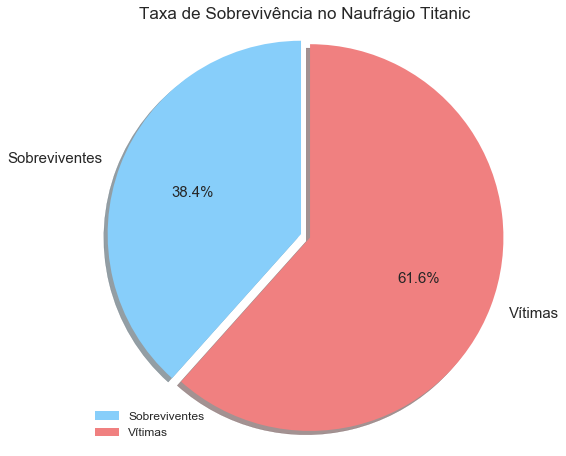

In [6]:
# Número de sobreviventes e vítimas
tx_surv = df.groupby('Survived').count()['Sex'][1]
tx_vict = df.groupby('Survived').count()['Sex'][0]

# Taxa de Sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [tx_surv, tx_vict]
explode = (0.05, 0)
colors = ['lightskyblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, 
                                   startangle=90, shadow=True, explode=explode, 
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Taxa de Sobrevivência no Naufrágio Titanic', fontsize=17)
ax.axis('equal')
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()
plt.setp(autotexts, size=15)
plt.setp(texts, size=15)
plt.show()

A taxa de vítimas é consideravelmente maior que a taxa de sobreviventes.

#### Sobreviventes por Gênero

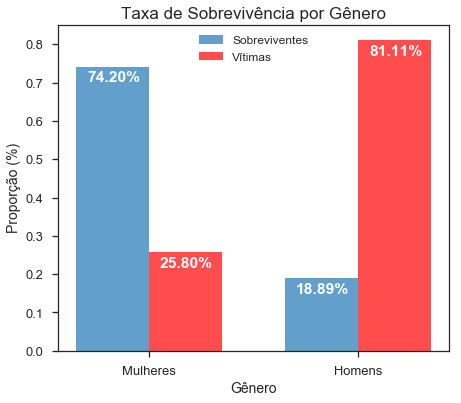

In [25]:
# Totalização por gênero
total_gender = df.groupby('Sex').count()['Name']

# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_gender
prop_f = proportions['female']
prop_m = proportions['male']

# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_m[1]]
victims = [prop_f[0], prop_m[0]]

# Preparando plotagem e definindo design gráfico
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, survivors, width, alpha=.7, label='Sobreviventes')
f_bar = plt.bar(ind+width, victims, width, color='r', alpha=.7, label='Vítimas')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Taxa de Sobrevivência por Gênero', fontsize=17)
locations = ind + width / 2
labels = ['Mulheres', 'Homens']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)

# Mostrando porcentagem dos dados
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

O gráfico acima indica que, da totalidade de instâncias do gênero feminino, 74,20\% mulheres sobreviveram e 25,80\% foram vítimas. Analogamente, considerando a quantidade total de homens, apenas 18,89\% sobreviveram e 81,11\% foram vítimas. Apesar de indicar que a probabilidade de uma mulher ter sobrevivido ao naufrágio foi maior, é importante ressaltar que a análise acima foi baseada na quantidade total por gênero, o que pode deturpar o julgamento, visto que a quantidade de mulheres presentes no navio era relativamente menor que a quantidade de homens.

Também é possível visualizar a proporção de sobreviventes e vítimas, levando em consideração os gêneros.

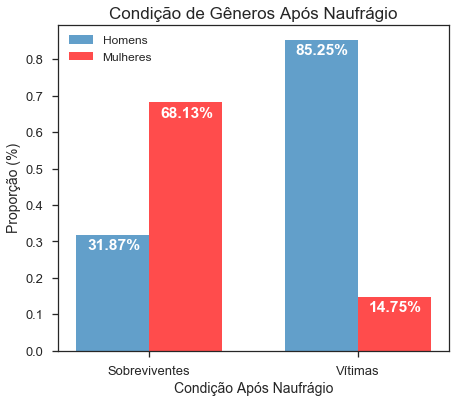

In [24]:
# Totalização por gênero
total_surv = df.groupby('Survived').count()['Name']

# Taxas de sobrevivência por gênero
gender_rate = df.groupby(['Sex', 'Survived']).count()['Name']
proportions = gender_rate / total_surv
prop_f = proportions['female']
prop_m = proportions['male']

# Proporção de sobreviventes e vítimas
survivors = [prop_f[1], prop_f[0]]
victims = [prop_m[1], prop_m[0]]

# Preparando plotagem
ind = np.arange(len(survivors))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(7, 6))
m_bar = plt.bar(ind, victims, width, alpha=.7, label='Homens')
f_bar = plt.bar(ind+width, survivors, width, color='r', alpha=.7, label='Mulheres')
plt.xlabel('Condição Após Naufrágio', fontsize=14)
plt.ylabel('Proporção (%)', fontsize=14)
plt.title('Condição de Gêneros Após Naufrágio', fontsize=17)
locations = ind + width / 2
labels = ['Sobreviventes', 'Vítimas']
plt.xticks(locations, labels, fontsize=13)
plt.legend(fontsize=12)

# Mostrando legenda dos dados
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2%}'.format(height), (p.get_x()+.15*width, p.get_y() + height - 0.04), 
                color='w', weight='bold')
plt.show()

Assim, é possível dizer que, da quantidade total de sobreviventes, 68,13\% eram mulheres e 31,87\% eram homens. De modo equivalente, da totalidade de vítimas, 85,25\% eram do gênero masculino e apenas 14,75\% do gênero feminino. A probabilidade de uma mulher ter sobrevivido ao naufrágio é bem maior que a de um homem. Alguns argumentos que possivelmente explicariam este resultado:

* Aplicação da regra "Mulheres e crianças primeiro";
* Maior quantidade de homens presentes;
* Peso máximo em botes salva-vidas;

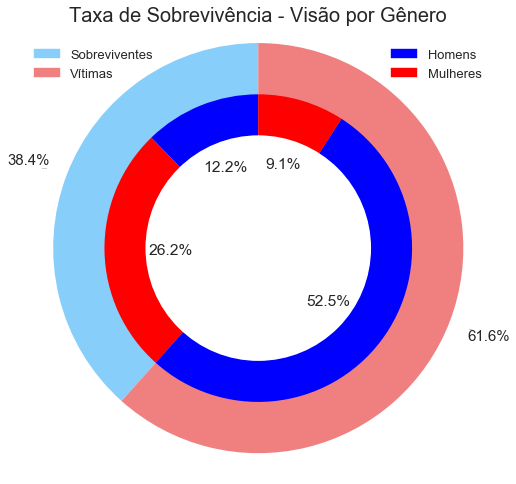

In [7]:
# Plotagem final da taxa de sobreviventes contendo informações de gênero

import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
prop_surv_m = surv_gender['male'] 

# Preparando dados para plotagem
labels = ['Sobreviventes', 'Vítimas']
sizes = [total_surv[1], total_surv[0]]
labels_gender = ['Masculino', 'Feminino'] * 2
sizes_gender = [prop_surv_m[1], prop_surv_f[1], prop_surv_m[0], prop_surv_f[0]]
colors = ['lightskyblue', 'lightcoral']
colors_gender = ['blue', 'red']
explode = (0.05, 0)
explode_gender = (0.05, 0, 0.05, 0)

# Criando figz e axes
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=90,
                                   frame=True, autopct='%1.1f%%', pctdistance=1.20)
wedges_g, texts_g, autotexts_g = plt.pie(sizes_gender, colors=colors_gender, radius=0.75, 
                  autopct='%1.1f%%', pctdistance=0.57, startangle=90)
center_circle = plt.Circle((0,0), 0.55, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.set_title('Taxa de Sobrevivência - Visão por Gênero', fontsize=20)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')

# Criando legenda manualmente
legend_f = mpatches.Patch(color='red', label='Mulheres')
legend_m = mpatches.Patch(color='blue', label='Homens')
legend_s = mpatches.Patch(color='lightskyblue', label='Sobreviventes')
legend_v = mpatches.Patch(color='lightcoral', label='Vítimas')
plt.legend(bbox_to_anchor=(0., 0.87, 1., .102), loc=3, 
           ncol=2, mode="expand", borderaxespad=0., handles=[legend_s, legend_v, legend_m, legend_f])
plt.tight_layout()
plt.setp(autotexts, size=15)
plt.setp(texts, size=0)
plt.show()

Desse modo, é possível perceber que a fatia interna vermelha, referente ao gênero feminino representa a maior parcela da fatia externa de sobreviventes. Em outras palavras, é válido dizer que 26,2\% de todos os passageiros e tripulantes podem ser classificados como sobreviventes do gênero feminino. Analogamente, é possível concluir, através da análise da fatia referente às vitimas, que 52,5\% do total de passageiros encontram-se no grupo de vítimas do gênero masculino.

#### Sobreviventes por Classe Econômica

É possível que a Classe Econômica de passageiros e tripulantes tivesse efeito direto na taxa de sobrevivência. Averiguando...

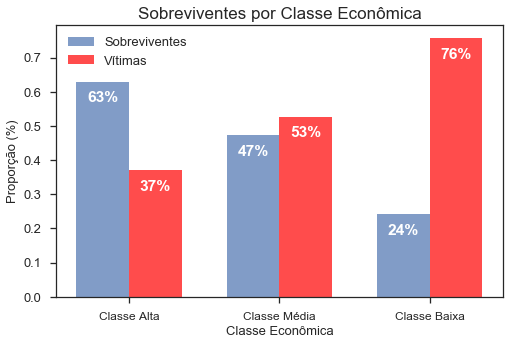

In [8]:
# Investigando Taxa de Sobrevivência por Classe Econômica

# Preparando dados
surv_counts = df.groupby(['Survived', 'Pclass']).count()['Name']
class_total = df.groupby('Pclass').count()['Name']
s_prop = surv_counts[1] / class_total
v_prop = surv_counts[0] / class_total

ind = np.arange(len(s_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, s_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, v_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Classe Econômica', fontsize=13)
plt.title('Sobreviventes por Classe Econômica', fontsize=17)
locations = ind + width / 2
labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
plt.xticks(locations, labels, fontsize=12)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

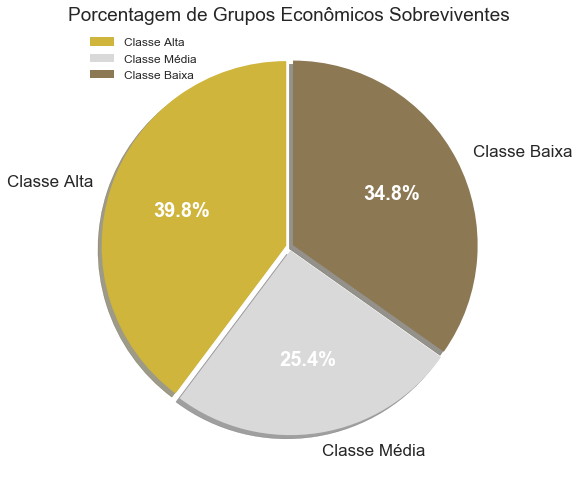

In [39]:
# Distribuição das Classes Econômicas no grupo de Sobreviventes

surv_class = df.groupby(['Survived', 'Pclass']).count()['Name'][1]
surv_class

labels = ['Classe Alta', 'Classe Média', 'Classe Baixa']
colors = ['#CFB53B', '#d9d9d9', '#8C7853']
explode = (0.02, 0.02, 0.02)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_class, labels=labels, 
                                   startangle=90, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Porcentagem de Grupos Econômicos Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

Assim como avaliado na análise de sobreviventes por gênero, a quantidade total em cada uma das classes pode interferir no julgamento sobre suas respectivas probabilidades de sobrevivência. Para tal, o gráfico abaixo foca apenas a visão de sobreviventes separados por classe econômica.

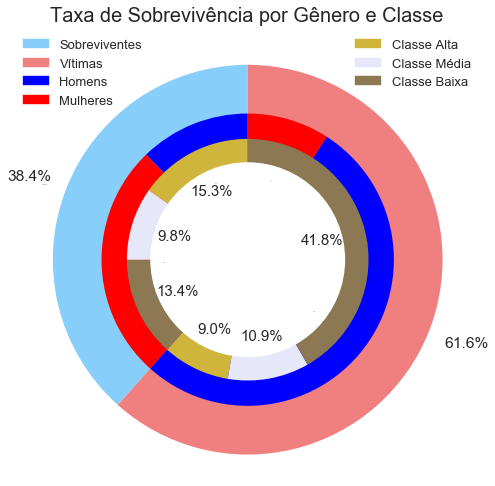

In [10]:
# Plotagem final da taxa de sobreviventes contendo informações de gênero

import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
import matplotlib.patches as mpatches

# Número de sobreviventes e vítimas
total_surv = df.groupby('Survived').count()['Name']

# Sobreviventes por gênero
surv_gender = df.groupby(['Sex', 'Survived']).count()['Name']
prop_surv_f = surv_gender['female'] 
prop_surv_m = surv_gender['male'] 

# Sobreviventes por classe social
surv_class = df.groupby(['Pclass', 'Survived']).count()['Name']
prop_surv_1 = surv_class[1]
prop_surv_2 = surv_class[2]
prop_surv_3 = surv_class[3]

# Fatia de sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [total_surv[1], total_surv[0]]

# Fatia de gêneros
labels_gender = ['Masculino', 'Feminino'] * 2
sizes_gender = [prop_surv_m[1], prop_surv_f[1], 
                prop_surv_m[0], prop_surv_f[0]]

# Fatia de classe econômica
labels_class = ['Alta', 'Média', 'Baixa'] * 2
sizes_class = [prop_surv_1[1], prop_surv_2[1], prop_surv_3[1], 
               prop_surv_1[0], prop_surv_2[0], prop_surv_3[0]]

# Definindo cores
colors = ['lightskyblue', 'lightcoral']
colors_gender = ['blue', 'red']
colors_class = ['#CFB53B', '#E6E8FA', '#8C7853']

# Criando plots
fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, startangle=90, radius=1.00,
                                   frame=True, autopct='%1.1f%%', pctdistance=1.20)
wedges_g, texts_g, autotexts_g = plt.pie(sizes_gender, colors=colors_gender, radius=0.75, 
                  autopct='%1.1f%%', pctdistance=0.57, startangle=90)
wedges_c, texts_c, autotexts_c = plt.pie(sizes_class, colors=colors_class, radius=0.62, 
                  autopct='%1.1f%%', pctdistance=0.64, startangle=90)

# Configurando especialidades do gráfico
center_circle = plt.Circle((0,0), 0.50, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax.set_title('Taxa de Sobrevivência por Gênero e Classe', fontsize=20)
ttl = ax.title
ttl.set_position([.5, 1.05])
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
legend_f = mpatches.Patch(color='red', label='Mulheres')
legend_m = mpatches.Patch(color='blue', label='Homens')
legend_s = mpatches.Patch(color='lightskyblue', label='Sobreviventes')
legend_v = mpatches.Patch(color='lightcoral', label='Vítimas')
legend_c1 = mpatches.Patch(color='#CFB53B', label='Classe Alta')
legend_c2 = mpatches.Patch(color='#E6E8FA', label='Classe Média')
legend_c3 = mpatches.Patch(color='#8C7853', label='Classe Baixa')

plt.legend(bbox_to_anchor=(0., 0.85, 1., .102), loc=3, 
           ncol=2, mode="expand", borderaxespad=0., 
           handles=[legend_s, legend_v, legend_m, legend_f, legend_c1, legend_c2, legend_c3])

plt.tight_layout()
plt.setp(autotexts_g, size=0)
plt.setp(autotexts_c, size=15)
plt.setp(texts, size=0)
plt.show()

Interpretando as informações obtidas, chega-se a conclusão de que passageiros de classe econômica alta possuíram maiores chances de sobrevivência, seguidos da classe média e baixa que, por sua vez, apresentou os maiores índices de instâncias vítimas do naufrágio (76\%). 

Alguns possíveis fatores que explicariam tal resultado:

* Passageiros de Classe Alta possivelmente tiveram prioridade para evacuação nos botes salva-vidas;
* Passageiros de Classe Alta possivelmente tiveram acesso facilitado durante a evacuação;
* Mesmo após a evacuação, passageiros de Classe Alta possivelmente tiveram melhores condições de proteção ao frio em alto mar;
* Por possivelmente possuírem melhores condições financeiras, os passageiros de Classe Alta poderiam ter habilidades de nado que se fizeram úteis após o naufrágio;

#### Sobreviventes por Faixa Etária

In [27]:
# Analisando propriedades estatísticas do atributo Age
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Para avaliar a influência da idade na taxa de sobrevivência, é necessário realizar um agrupamento nos dados numéricos de acordo com as faixas abaixo:

* Crianças - Passageiros com idade menor que 21 anos;
* Adultos - Passageiros com idade entre 21 e 50 anos;
* Idosos - Passageiros com 50 anos de idade ou mais.

In [28]:
# Agrupando - Definindo ranges
bin_edges = [df['Age'].describe()['min'], 21, 
             55, df['Age'].describe()['max']]

bin_edges

[0.42, 21, 55, 80.0]

In [29]:
# Definindo Labels
bin_names = ['Criança', 'Adulto', 'Idoso']
bin_names

['Criança', 'Adulto', 'Idoso']

In [30]:
# Aplicando .cut()
pd.cut(df['Age'], bin_edges, labels=bin_names)[:15]

PassengerId
1      Adulto
2      Adulto
3      Adulto
4      Adulto
5      Adulto
6      Adulto
7      Adulto
8     Criança
9      Adulto
10    Criança
11    Criança
12      Idoso
13    Criança
14     Adulto
15    Criança
Name: Age, dtype: category
Categories (3, object): [Criança < Adulto < Idoso]

In [31]:
# Verificando alterações
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S


In [32]:
# Aparentemente os resultados batem, porém as alterações não foram incluídas no Dataset.

# Criando nova coluna
df['AgeRange'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

In [33]:
# Verificando alterações no Dataset
df.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adulto
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Adulto
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Criança
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Adulto


In [34]:
# Filtrando visualização
df.loc[:, ['Name', 'Survived', 'Age', 'AgeRange']].head(15)

,Name,Survived,Age,AgeRange
PassengerId,,,,
1,"Braund, Mr. Owen Harris",0,22.000000,Adulto
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,Adulto
3,"Heikkinen, Miss. Laina",1,26.000000,Adulto
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,Adulto
5,"Allen, Mr. William Henry",0,35.000000,Adulto
6,"Moran, Mr. James",0,29.699118,Adulto
7,"McCarthy, Mr. Timothy J",0,54.000000,Adulto
8,"Palsson, Master. Gosta Leonard",0,2.000000,Criança
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,Adulto


In [35]:
# Há alguma inconsistência nos dados?
df['AgeRange'].isnull().values.any()

True

Parece que alguns dados não foram classificados corretamente. É preciso verificar em quais linhas este problema ocorreu.

In [36]:
df_age_null = df[df['AgeRange'].isnull()]
df_age_null

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,NaN


Então o passageiro de id 804 e idade 0.42 não foi classificado como deveria. Provavelmente algum erro nos parâmetros de `cut()`.

In [37]:
# Classificando manualmente e verificando alterações
df['AgeRange'][804] = 'Criança'

print(f'Há dados nulos na coluna "AgeRange"? {df.isnull().values.any()}')
print(f'Qual a classificação do passageiro 804? {df["AgeRange"][804]}')

Há dados nulos na coluna "AgeRange"? False
Qual a classificação do passageiro 804? Criança


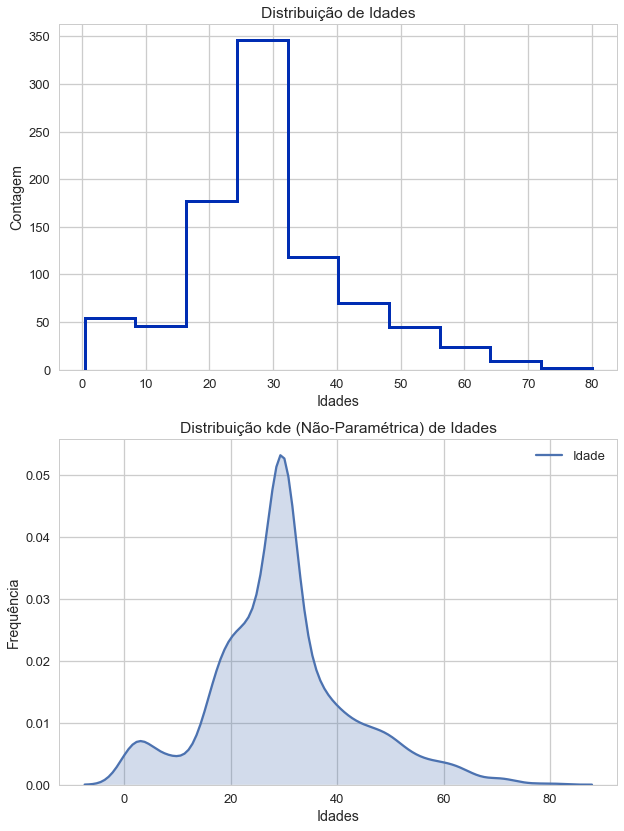

In [38]:
# Plotando distribuição de idades
# Distribuição de Idades
fig, ax = plt.subplots(1, 2, figsize=(10, 14))
sns.set_context('talk')
sns.set_style('whitegrid')
# Primeiro plot = histograma
plt.subplot(211)
sns.distplot(df['Age'], kde=False, bins=10, 
             hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "#002db3"})
plt.title('Distribuição de Idades')
plt.xlabel('Idades')
plt.ylabel('Contagem')
# Segundo plot = kde
plt.subplot(212)
sns.kdeplot(df['Age'], shade=True, label='Idade')
plt.title('Distribuição kde (Não-Paramétrica) de Idades')
plt.xlabel('Idades')
plt.ylabel('Frequência')

plt.show()

In [13]:
# PLotando gráfico

# Agrupando dados por condição após naufrágio e faixa etária
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
surv_age

Survived  AgeRange
0         Criança     117
          Adulto      404
          Idoso        28
1         Criança      87
          Adulto      242
          Idoso        12
Name: Name, dtype: int64

In [14]:
# Contagem total de cada faixa etária
age_total = df.groupby('AgeRange').count()['Name']
age_total

AgeRange
Criança    204
Adulto     646
Idoso       40
Name: Name, dtype: int64

In [15]:
# Proporção de cada faixa etária com relação as condições pós-naufrágio
age_prop = surv_age / age_total
age_prop

Survived  AgeRange
0         Criança     0.573529
          Adulto      0.625387
          Idoso       0.700000
1         Criança     0.426471
          Adulto      0.374613
          Idoso       0.300000
Name: Name, dtype: float64

In [16]:
# Indexando valores
surv_prop = age_prop[1]
vict_prop = age_prop[0]

surv_prop

AgeRange
Criança    0.426471
Adulto     0.374613
Idoso      0.300000
Name: Name, dtype: float64

Após os testes, é possível plotar a análise graficamente.

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


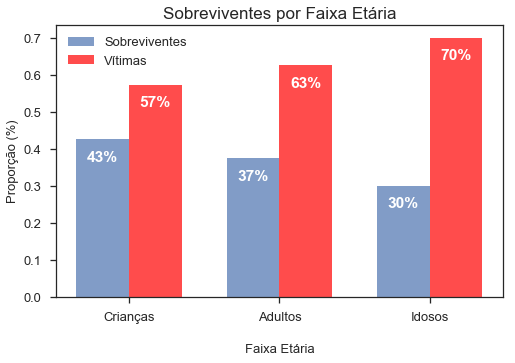

In [18]:
# Investigando Taxa de Sobrevivência por Classe Econômica

# Preparando dados
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name']
age_total = df.groupby('AgeRange').count()['Name']
age_prop = surv_age / age_total
surv_prop = age_prop[1]
vict_prop = age_prop[0]

ind = np.arange(len(surv_prop))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Faixa Etária', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Faixa Etária', fontsize=17)
locations = ind + width / 2
labels = ['Crianças', 'Adultos', 'Idosos']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

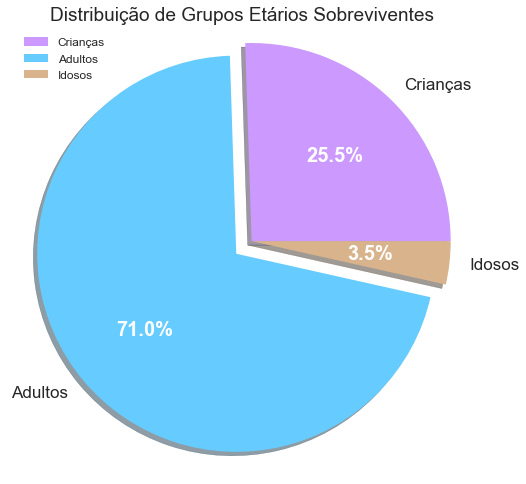

In [19]:
# Distribuição por Sobreviventes

# Sobreviventes por classe social
surv_age = df.groupby(['Survived', 'AgeRange']).count()['Name'][1]

labels = ['Crianças', 'Adultos', 'Idosos']
colors = ['#cc99ff', '#66ccff', '#d9b38c']
explode = (0.0, 0.1, 0.0)
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(surv_age, labels=labels, 
                                   startangle=0, shadow=True, explode=explode,
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Distribuição de Grupos Etários Sobreviventes', fontsize=19)
ax.axis('equal')
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.setp(autotexts, size=20, weight='bold', color='w')
plt.setp(texts, size=17)
plt.show()

In [40]:
# Salvando novo Dataset
df.to_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited-2.csv')

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/titanic-data-6-edited-2.csv')
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adulto
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adulto
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adulto
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adulto
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adulto


#### Sobreviventes por Porto de Embarque

Função para retornar dados estatísticos relevantes sobre passageiros de acordo com o porto de embarque

In [2]:
def stats_bay(bay):
    bay = bay.strip().upper()
    
    contagem = df.groupby('Embarked').count()['Name']
    medias = df.groupby('Embarked').mean()
    p_class_emb = df.groupby(['Embarked', 'Pclass']).count()['Name']
    prop_class = 100 *  p_class_emb[bay] / contagem[bay]
    gender_emb = df.groupby(['Embarked', 'Sex']).count()['Name']
    prop_gender = 100 * gender_emb[bay] / contagem[bay]
    agerange_emb = df.groupby(['Embarked', 'AgeRange']).count()['Name']
    prop_agerange = 100 * agerange_emb[bay] / contagem[bay]
    surv_emb = df.groupby(['Embarked', 'Survived']).count()['Name']
    prop_surv = 100 * surv_emb[bay] / contagem[bay]
    
    if bay == 'C':
        bay_name = 'Cherbourg'
    elif bay == 'S':
        bay_name = 'Southampton'
    else:
        bay_name = 'Queenstown'

    print(f'- - - DADOS DE {bay_name.upper()} - - -')
    print(f'Total de passageiros com embarque em {bay_name}: {contagem[bay]} pessoas.')
    print(f'Idade média dos passageiros de {bay_name}: {medias["Age"][bay]:.2f} anos.')
    print(f'Ticket médio dos passageiros de {bay_name}: ${medias["Fare"][bay]:.2f}')
    print('- - - CLASSE ECONÔMICA - - -')
    print(f'Porcentagem de Classe Alta que embarcaram em {bay_name}: {prop_class[1]:.2f}%')
    print(f'Porcentagem de Classe Média que embarcaram em {bay_name}: {prop_class[2]:.2f}%')
    print(f'Porcentagem de Classe Baixa que embarcaram em {bay_name}: {prop_class[3]:.2f}%')
    print('- - - GÊNERO - - -')
    print(f'Porcetagem de Homens que embarcaram em {bay_name}: {prop_gender["male"]:.2f}%')
    print(f'Porcetagem de Mulheres que embarcaram em {bay_name}: {prop_gender["female"]:.2f}%')
    print('- - - FAIXA ETÁRIA - - -')
    print(f'Porcentagem de Crianças que embarcaram em {bay_name}: {prop_agerange["Criança"]:.2f}%')
    print(f'Porcentagem de Adultos que embarcaram em {bay_name}: {prop_agerange["Adulto"]:.2f}%')
    print(f'Porcentagem de Idosos que embarcaram em {bay_name}: {prop_agerange["Idoso"]:.2f}%')
    print('- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -')
    print(f'Probabilidade de sobrevivência para embarcantes em {bay_name}: {prop_surv[1]:.2f}%')

In [3]:
stats_bay('s')

- - - DADOS DE SOUTHAMPTON - - -
Total de passageiros com embarque em Southampton: 646 pessoas.
Idade média dos passageiros de Southampton: 29.54 anos.
Ticket médio dos passageiros de Southampton: $27.24

- - - CLASSE ECONÔMICA - - -
Porcentagem de Classe Alta que embarcaram em Southampton: 19.97%
Porcentagem de Classe Média que embarcaram em Southampton: 25.39%
Porcentagem de Classe Baixa que embarcaram em Southampton: 54.64%

- - - GÊNERO - - -
Porcetagem de Homens que embarcaram em Southampton: 68.27%
Porcetagem de Mulheres que embarcaram em Southampton: 31.73%

- - - FAIXA ETÁRIA - - -
Porcentagem de Crianças que embarcaram em Southampton: 24.61%
Porcentagem de Adultos que embarcaram em Southampton: 71.36%
Porcentagem de Idosos que embarcaram em Southampton: 4.02%

- - - PROBABILIDADE DE SOBREVIVÊNCIA - - -
Probabilidade de sobrevivência para embarcantes em Southampton: 33.90%


Apesar da massiva quantidade de dados na análise acima, seria interessante visualizar apenas a plotagem gráfica de alguns atributos.

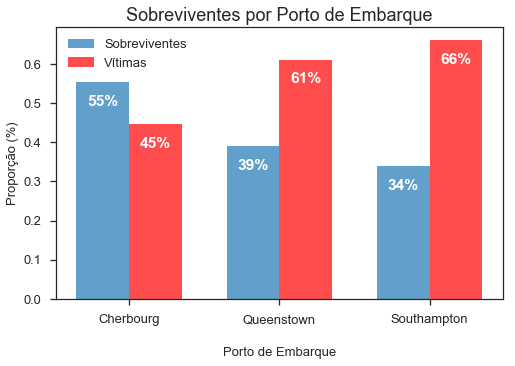

In [4]:
# Preparando dados
surv_emb = df.groupby(['Survived', 'Embarked']).count()['Name']
emb_total = df.groupby('Embarked').count()['Name']
emb_prop = surv_emb / emb_total
surv_prop = emb_prop[1]
vict_prop = emb_prop[0]

ind = np.arange(len(emb_prop[1]))
width = .35
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(8, 5))
s_bar = plt.bar(ind, surv_prop, width, alpha=.7, label='Sobreviventes')
v_bar = plt.bar(ind+width, vict_prop, width, color='r', alpha=.7, label='Vítimas')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Sobreviventes por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height - 0.06), 
                color='w', weight='bold')
plt.show()

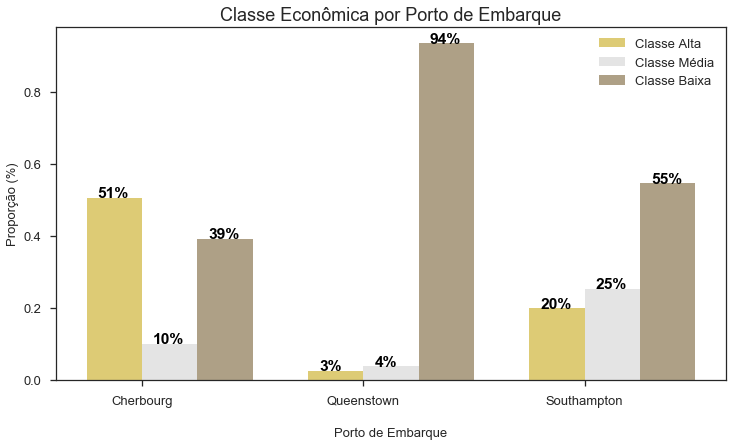

In [18]:
# Agrupamento de Classe Econômica por Porto de Embarque
pclass_emb = df.groupby(['Pclass', 'Embarked']).count()['Name']

# Contagem total por Porto
emb_total = df.groupby('Embarked').count()['Name']

# Proporção de Classe Econômica por Porto
emb_prop = pclass_emb / emb_total
high_class = emb_prop[1]
medium_class = emb_prop[2]
low_class = emb_prop[3]

# Configurando barras e figure
ind = np.arange(len(high_class))
width = .25
sns.set_style('ticks')
sns.set_context('talk')

# Criando figs e axes
fig, ax = plt.subplots(figsize=(12, 6.5))
high_bar = plt.bar(ind, high_class, width, color='#CFB53B', alpha=.7, label='Classe Alta')
medium_bar = plt.bar(ind+width, medium_class, width, color='#d9d9d9', alpha=.7, label='Classe Média')
low_bar = plt.bar(ind+2*width, low_class, width, color='#8C7853', alpha=.7, label='Classe Baixa')
plt.ylabel('Proporção (%)', fontsize=13)
plt.xlabel('Porto de Embarque', fontsize=13, labelpad=20)
plt.title('Classe Econômica por Porto de Embarque', fontsize=18)
locations = ind + width / 2
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.xticks(locations, labels, fontsize=13)
plt.legend()

# Mostrando porcentagem de dados nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (p.get_x()+.20*width, p.get_y() + height + 0.00), 
                color='black', weight='bold')

plt.show()

# Data Science Academy

Os estudos não podem parar! De acordo com o avanço no curso de Python Fundamentos para Análise de Dados na plataforma DSA, chegou o momento de documentar as análises exploratórias em um Jupyter Notebook. Muito provavelmente, poucos estudos de casos serão utilizados com EDA puro, uma vez que a DSA introduz rapidamente conceitos de Machine Learning.

## Mercado de Trabalho: Programadores de Softwares

Neste tópico, são apresentados dados reais de uma pesquisa recente nos EUA sobre o mercado de trabalho para Programadores de Softwares. O objetivo é investigar a base e verificar as operações necessárias para limpeza e preparação dos dados. Posteriormente, serão aplicadas algumas técnicas para retiradas de insights.

### Avaliando os Dados

In [3]:
# Importando bibliotecas necessárias e lendo arquivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys # Ajuda a criar cores para os gráficos
%matplotlib inline

df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv')

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Aparentemente será necessário especificar mais alguns parâmetros
df = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/dados-pesquisa.csv', low_memory=False)

In [5]:
# Verificando cabeçalho
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


Pela descrição acima, há 113 colunas no Dataset! 

In [9]:
# Verificando linhas e colunas do Dataset
print(f'O Dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O Dataset possui 15620 linhas e 113 colunas.


**Ponto:** Como trata-se de um Dataset gigantesco, muito provavelmente serão encontrados Dados Nulos e qualquer outro tipo de incoerência. Ademais, é relativamente difícil entender o significado de 113 colunas! Dessa forma, serão analisados apenas aspectos pontuais em algumas colunas. Apenas alguns atributos serão avaliados, sendo estes:

* **Age** - Define a idade dos pesquisados;
* **Gender** - Define o gênero dos pesquisados;
* **JobRoleInterest** - Define a área de trabalho de desejo dos pesquisados;
* **EmploymentField** - Define a área na qual o pesquisado está empregado;
* **JobPref** - Define o tipo preferido de trabalho dos pesquisados;
* **JobRealocateYesNo** - Define se o pesquisado tem interesse em ser realocado de área;
* **HoursLearning** - Define a quantidade de horas em que cada pesquisado dedica para cursos/estudos;
* **ExpectedEarning** - Define quanto os pesquisados esperam ganhar no futuro;

In [10]:
# Printando colunas
for col in df.columns:
    print(col, end=', ')

Age, AttendedBootcamp, BootcampFinish, BootcampFullJobAfter, BootcampLoanYesNo, BootcampMonthsAgo, BootcampName, BootcampPostSalary, BootcampRecommend, ChildrenNumber, CityPopulation, CodeEventBootcamp, CodeEventCoffee, CodeEventConferences, CodeEventDjangoGirls, CodeEventGameJam, CodeEventGirlDev, CodeEventHackathons, CodeEventMeetup, CodeEventNodeSchool, CodeEventNone, CodeEventOther, CodeEventRailsBridge, CodeEventRailsGirls, CodeEventStartUpWknd, CodeEventWomenCode, CodeEventWorkshop, CommuteTime, CountryCitizen, CountryLive, EmploymentField, EmploymentFieldOther, EmploymentStatus, EmploymentStatusOther, ExpectedEarning, FinanciallySupporting, Gender, HasChildren, HasDebt, HasFinancialDependents, HasHighSpdInternet, HasHomeMortgage, HasServedInMilitary, HasStudentDebt, HomeMortgageOwe, HoursLearning, ID.x, ID.y, Income, IsEthnicMinority, IsReceiveDiabilitiesBenefits, IsSoftwareDev, IsUnderEmployed, JobApplyWhen, JobPref, JobRelocateYesNo, JobRoleInterest, JobRoleInterestOther, JobW

In [11]:
# Verificando estatísticas
df.describe()

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,23.000000,0.000000,0.000000,0.000000,0.000000,3.000000,50000.000000,1.000000,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10000.000000
50%,27.000000,0.000000,1.000000,1.000000,0.000000,6.000000,60000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000.000000
75%,33.000000,0.000000,1.000000,1.000000,1.000000,12.000000,77000.000000,1.000000,2.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40000.000000
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


In [15]:
# Verificando média de idade
print(f'A média de idade dos pesquisados é de aproximadamente {round(df["Age"].mean())} anos.')

A média de idade dos pesquisados é de aproximadamente 29 anos.


In [122]:
# Função para retornar quantidade de valores em uma coluna em específico
def col_describe(df, col_name):
    spacing = 0
    column_values = df[col_name.strip()].value_counts()
    if column_values.index.dtype == 'O':
        for instance in column_values.index:
            if len(instance) > spacing:
                spacing = len(instance) + 5
    for instance in column_values.index:
        print(f'{instance:<{spacing}} - {column_values[instance]}')

In [123]:
# Verificando dados sobre atributo Gender
col_describe(df, 'Gender')

male             - 10766
female           - 2840
genderqueer      - 66
agender          - 38
trans            - 36


In [124]:
# Verificando dados sobre atributo SchoolDegree
col_describe(df, 'SchoolDegree')

bachelor's degree                            - 5644
some college credit, no degree               - 2268
master's degree (non-professional)           - 1445
high school diploma or equivalent (GED)      - 1356
some high school                             - 764
professional degree (MBA, MD, JD, etc.)      - 692
associate's degree                           - 649
trade, technical, or vocational training     - 443
no high school (secondary school)            - 258
Ph.D.                                        - 160


In [125]:
# Verificando dados sobre JobRoleInterest
col_describe(df, 'JobRoleInterest')

Full-Stack Web Developer              - 2571
  Front-End Web Developer             - 1379
Back-End Web Developer                - 704
  Data Scientist / Data Engineer      - 646
  Mobile Developer                    - 414
  User Experience Designer            - 275
  DevOps / SysAdmin                   - 219
  Product Manager                     - 191
  Quality Assurance Engineer          - 104


In [126]:
# Verificando dados sobre EmploymentField
col_describe(df, 'EmploymentField')

software development and IT                - 4349
education                                  - 610
arts, entertainment, sports, or media      - 416
office and administrative support          - 414
sales                                      - 335
food and beverage                          - 279
finance                                    - 274
health care                                - 264
architecture or physical engineering       - 150
transportation                             - 149
software development                       - 134
construction and extraction                - 118
legal                                      - 68
law enforcement and fire and rescue        - 29
farming, fishing, and forestry             - 19


In [127]:
# Verificando dados sobre JobPref
col_describe(df, 'JobPref')

work for a medium-sized company      - 3281
freelance                            - 2261
start your own business              - 2234
work for a startup                   - 2031
work for a multinational corporation - 1382


In [132]:
# Verificando dados sobre MoneyForLearning (atributo numérico)
col_describe(df, 'MoneyForLearning')

0.0 - 6587
100.0 - 1071
200.0 - 756
500.0 - 716
50.0 - 564
1000.0 - 518
300.0 - 444
20.0 - 221
150.0 - 217
2000.0 - 217
400.0 - 198
30.0 - 193
5000.0 - 165
250.0 - 152
3000.0 - 137
1500.0 - 126
10.0 - 118
10000.0 - 114
60.0 - 112
40.0 - 105
600.0 - 100
4000.0 - 89
25.0 - 74
15000.0 - 70
20000.0 - 65
2500.0 - 61
12000.0 - 60
700.0 - 58
800.0 - 57
1200.0 - 52
80.0 - 49
15.0 - 45
6000.0 - 45
120.0 - 44
350.0 - 44
75.0 - 44
7000.0 - 35
8000.0 - 34
9000.0 - 28
5.0 - 26
18000.0 - 25
13000.0 - 24
35.0 - 23
90.0 - 22
1.0 - 20
16000.0 - 19
3500.0 - 19
70.0 - 18
900.0 - 18
17000.0 - 16
25000.0 - 16
450.0 - 15
45.0 - 14
125.0 - 14
11000.0 - 14
24.0 - 13
14000.0 - 13
4500.0 - 13
30000.0 - 11
160.0 - 10
750.0 - 9
12.0 - 9
7500.0 - 9
19.0 - 9
1300.0 - 8
180.0 - 8
1800.0 - 8
130.0 - 8
2.0 - 8
2200.0 - 7
99.0 - 7
29.0 - 7
13500.0 - 7
650.0 - 7
50000.0 - 7
3.0 - 7
1600.0 - 7
6500.0 - 7
1400.0 - 7
1700.0 - 6
1100.0 - 6
65.0 - 6
14.0 - 6
175.0 - 5
12500.0 - 5
100000.0 - 5
5500.0 - 5
2800.0 - 5
9500.0 - 5

### Preparando os Dados

A primeira coisa que poderia ser feita neste Dataset é criar uma nova coluna com os _Ranges de Idades_, ou seja, aplicar uma regra que classifica os pesquisados de acordo com a idade, utilizando para isso, a função ```cut()``` do Pandas.

In [133]:
# Dados sobre a coluna Age
df['Age'].describe()

count    13613.000000
mean        29.175421
std          9.017716
min         10.000000
25%         23.000000
50%         27.000000
75%         33.000000
max         86.000000
Name: Age, dtype: float64

Antes, vamos testar a função ```apply()``` do Pandas.

In [137]:
# Verificando idades antes do apply
df['Age'].head()

0    28.0
1    22.0
2    19.0
3    26.0
4    20.0
Name: Age, dtype: float64

In [136]:
# Somando um inteiro em todas as idades
df_teste = df.copy()
df_teste['Age'] = df_teste['Age'].apply(lambda x: x+10)

In [138]:
# Verificando idades após o apply
df_teste['Age'].head()

0    38.0
1    32.0
2    29.0
3    36.0
4    30.0
Name: Age, dtype: float64

In [143]:
# A média teria que ter sido acrescida em 10 unidades
print(f'Média de idades anterior: {df["Age"].mean():.2f} anos.')
print(f'Média de idades após o apply: {df_teste["Age"].mean():.2f} anos.')
print(f'Diferença: {(df_teste["Age"].mean() - df["Age"].mean()):.2f} anos')

Média de idades anterior: 29.18 anos.
Média de idades após o apply: 39.18 anos.
Diferença: 10.00 anos


In [145]:
# Aplicando cut e criando uma nova coluna
bins = [0, 20, 30, 40, 50, 60, 90]
labels = ['< 20', '20-30', '30-40', '40-50', '50-60', '> 60']

df['AgeRange'] = pd.cut(df['Age'], bins, labels=labels)

In [148]:
# Verificando resultado
df.iloc[:, np.r_[0, -1]].head()

,Age,AgeRange
0,28.0,20-30
1,22.0,20-30
2,19.0,< 20
3,26.0,20-30
4,20.0,< 20


In [156]:
# Há dados nulos em ambas as colunas?
df['Age'].isnull().values.sum()

2007

In [155]:
df['AgeRange'].isnull().any()

True

In [158]:
# O que será que aconteceu na coluna AgeRange nestes 2007 dados nulos?
df[df['Age'].isnull()].iloc[:5, np.r_[0, -1]]

,Age,AgeRange
13,NaN,NaN
105,NaN,NaN
720,NaN,NaN
730,NaN,NaN
734,NaN,NaN


In [194]:
# Testando crosstab
agerange_jobpref = pd.crosstab(df['AgeRange'], df['JobPref'])

In [195]:
agerange_jobpref.head()

JobPref,freelance,start your own business,work for a medium-sized company,work for a multinational corporation,work for a startup
AgeRange,,,,,
< 20,290,422,299,276,284
20-30,836,916,1453,612,995
30-40,513,435,773,212,344
40-50,271,153,274,56,113
50-60,101,41,78,15,21


In [196]:
# Cruzando dados e inserindo as médias
agerange_jobpref = pd.crosstab(df['AgeRange'], df['JobPref']).apply(lambda x: x/x.sum(), axis=1)

In [197]:
agerange_jobpref

JobPref,freelance,start your own business,work for a medium-sized company,work for a multinational corporation,work for a startup
AgeRange,,,,,
< 20,0.184596,0.268619,0.190325,0.175684,0.180777
20-30,0.173732,0.190357,0.301953,0.127182,0.206775
30-40,0.225296,0.191041,0.339482,0.093105,0.151076
40-50,0.312572,0.176471,0.316032,0.064591,0.130334
50-60,0.394531,0.160156,0.304688,0.058594,0.082031
> 60,0.571429,0.111111,0.190476,0.047619,0.079365


In [198]:
# Verificando suspeita de proporcionalidade
agerange_jobpref.iloc[1, :].sum()

1.0

In [199]:
# Verificando suspeita de não proporcionalidade
agerange_jobpref['freelance '].sum()

1.8621564864562432

O novo DataFrame agerange_jobpref criado será útil para plotagens gráficas futuras.

### Exploração Gráfica

**Distribuição de gêneros entre os participantes da pesquisa**

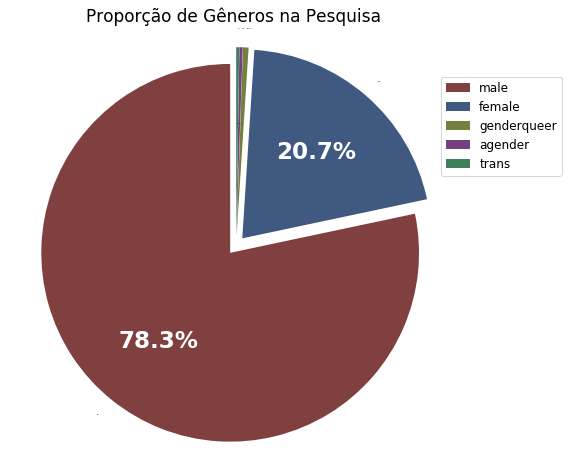

In [268]:
# Definindo quantidades e labels
values = df['Gender'].value_counts()
labels = values.index
num = len(labels)

# Criando lista de cores
listaHSV = [(x*3/num, 0.5, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de pizza
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(values, colors=listaRGB, startangle=90, labels=labels, explode=explode, autopct='%1.1f%%')
plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=12)
ax.axis('equal')
ax.set_title('Proporção de Gêneros na Pesquisa', fontsize=17)
plt.setp(texts, size=0)
plt.setp(autotexts[2:], size=0)
plt.setp(autotexts[:2], size=23, color='w', weight='bold')
plt.show()

""" **Distribuição de Carreiras de Interesse entre os entrevistados** """

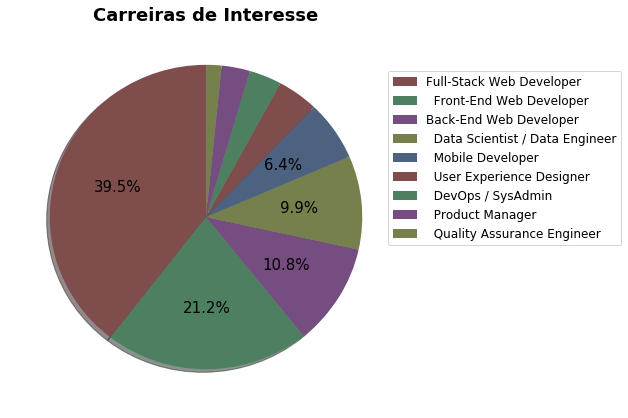

In [301]:
# Definindo labels e quantidades
qtds = df['JobRoleInterest'].value_counts()
labels = qtds.index

# Lista de cores
listaHSV = [(x*2/num, 0.4, 0.5) for x in range(num)]
listaRGB = list(map(lambda x: colorsys.hsv_to_rgb(*x), listaHSV))

# Gráfico de pizza
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(qtds, labels=labels, startangle=90, autopct='%1.1f%%', colors=listaRGB, shadow=True)
plt.legend(bbox_to_anchor = (0.95,0.90), fontsize=12)
plt.setp(texts, visible=False)
plt.title('Carreiras de Interesse', fontsize=18, weight='bold')
plt.setp(autotexts[-4:], visible=False)
plt.setp(autotexts[:-4], size=15)
plt.show()

In [ ]:
# Definindo quantidades

# Número de sobreviventes e vítimas
tx_surv = df.groupby('Survived').count()['Sex'][1]
tx_vict = df.groupby('Survived').count()['Sex'][0]

# Taxa de Sobreviventes
labels = ['Sobreviventes', 'Vítimas']
sizes = [tx_surv, tx_vict]
explode = (0.05, 0)
colors = ['lightskyblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, 
                                   startangle=90, shadow=True, explode=explode, 
                                  autopct='%1.1f%%', colors=colors)
ax.set_title('Taxa de Sobrevivência no Naufrágio Titanic', fontsize=17)
ax.axis('equal')
plt.legend(fontsize=12, loc='lower left')
plt.tight_layout()
plt.setp(autotexts, size=15)
plt.setp(texts, size=15)
plt.show()